In [1]:
import pandas as pd
import numpy as np
#import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
dfData=pd.read_csv("Data.csv") # lecture du fichier Data

dfData

Territoire  Statut                       Date  Production totale (MW)  \
0          Corse  Validé  2016-01-01T00:00:00+01:00              325.628703   
1          Corse  Validé  2016-01-01T01:00:00+01:00              289.130663   
2          Corse  Validé  2016-01-01T02:00:00+01:00              262.482111   
3          Corse  Validé  2016-01-01T03:00:00+01:00              241.838194   
4          Corse  Validé  2016-01-01T04:00:00+01:00              229.216871   
...          ...     ...                        ...                     ...   
61363      Corse  Estimé  2022-12-31T19:00:00+01:00              300.810000   
61364      Corse  Estimé  2022-12-31T20:00:00+01:00              280.530000   
61365      Corse  Estimé  2022-12-31T21:00:00+01:00              262.500000   
61366      Corse  Estimé  2022-12-31T22:00:00+01:00              271.380000   
61367      Corse  Estimé  2022-12-31T23:00:00+01:00              285.950000   

       Thermique (MW)  Bagasse/charbon (MW)  Hydraulique (MW)  \
0          175.261507                   NaN          4.561752   
1          166.800841                   NaN         -1.839914   
2          147.862507                   NaN         -1.839914   
3          130.558174                   NaN         -1.841581   
4          127.444341                   NaN         -1.839914   
...               ...                   ...               ...   
61363       77.150000                   NaN         64.040000   
61364       77.180000                   NaN         57.510000   
61365       76.970000                   NaN         49.290000   
61366       77.410000                   NaN         43.440000   
61367       77.020000                   NaN         52.010000   

       Micro-hydraulique (MW)  Solaire photovoltaïque (MW)  Eolien (MW)  \
0                    4.771676                    -0.042256     0.228256   
1                    4.773676                    -0.039756     0.214590   
2                    4.861676                    -0.040256     0.215090   
3                    4.772676                    -0.039930     0.216923   
4                    4.765676                    -0.038263     0.208923   
...                       ...                          ...          ...   
61363                8.525860                    10.910000    -0.020000   
61364                8.751890                     9.920000    -0.020000   
61365                8.785650                     0.340000    -0.020000   
61366                8.790890                    -0.480000    -0.010000   
61367                8.762500                    -0.460000     0.100000   

       Bioénergies (MW)  Géothermie (MW)  Importations (MW)  \
0              1.829167              NaN         139.018600   
1              1.829167              NaN         117.392059   
2              1.829500              NaN         109.593508   
3              1.829000              NaN         106.342931   
4              1.829000              NaN          96.847108   
...                 ...              ...                ...   
61363          0.000000              NaN         140.195765   
61364          0.000000              NaN         127.185765   
61365          0.000000              NaN         127.136375   
61366          0.000000              NaN         142.225765   
61367          0.000000              NaN         148.515765   

       Coût moyen de production (€/MWh)  
0                                196.76  
1                                207.40  
2                                204.32  
3                                198.60  
4                                203.04  
...                                 ...  
61363                               NaN  
61364                               NaN  
61365                               NaN  
61366                               NaN  
61367                               NaN  

[61368 rows x 14 columns]

In [3]:
# pour mettre les valeurs negatives à 0
num = dfData._get_numeric_data()
num[num < 0] = 0
dfData #ok

Territoire  Statut                       Date  Production totale (MW)  \
0          Corse  Validé  2016-01-01T00:00:00+01:00              325.628703   
1          Corse  Validé  2016-01-01T01:00:00+01:00              289.130663   
2          Corse  Validé  2016-01-01T02:00:00+01:00              262.482111   
3          Corse  Validé  2016-01-01T03:00:00+01:00              241.838194   
4          Corse  Validé  2016-01-01T04:00:00+01:00              229.216871   
...          ...     ...                        ...                     ...   
61363      Corse  Estimé  2022-12-31T19:00:00+01:00              300.810000   
61364      Corse  Estimé  2022-12-31T20:00:00+01:00              280.530000   
61365      Corse  Estimé  2022-12-31T21:00:00+01:00              262.500000   
61366      Corse  Estimé  2022-12-31T22:00:00+01:00              271.380000   
61367      Corse  Estimé  2022-12-31T23:00:00+01:00              285.950000   

       Thermique (MW)  Bagasse/charbon (MW)  Hydraulique (MW)  \
0          175.261507                   NaN          4.561752   
1          166.800841                   NaN          0.000000   
2          147.862507                   NaN          0.000000   
3          130.558174                   NaN          0.000000   
4          127.444341                   NaN          0.000000   
...               ...                   ...               ...   
61363       77.150000                   NaN         64.040000   
61364       77.180000                   NaN         57.510000   
61365       76.970000                   NaN         49.290000   
61366       77.410000                   NaN         43.440000   
61367       77.020000                   NaN         52.010000   

       Micro-hydraulique (MW)  Solaire photovoltaïque (MW)  Eolien (MW)  \
0                    4.771676                         0.00     0.228256   
1                    4.773676                         0.00     0.214590   
2                    4.861676                         0.00     0.215090   
3                    4.772676                         0.00     0.216923   
4                    4.765676                         0.00     0.208923   
...                       ...                          ...          ...   
61363                8.525860                        10.91     0.000000   
61364                8.751890                         9.92     0.000000   
61365                8.785650                         0.34     0.000000   
61366                8.790890                         0.00     0.000000   
61367                8.762500                         0.00     0.100000   

       Bioénergies (MW)  Géothermie (MW)  Importations (MW)  \
0              1.829167              NaN         139.018600   
1              1.829167              NaN         117.392059   
2              1.829500              NaN         109.593508   
3              1.829000              NaN         106.342931   
4              1.829000              NaN          96.847108   
...                 ...              ...                ...   
61363          0.000000              NaN         140.195765   
61364          0.000000              NaN         127.185765   
61365          0.000000              NaN         127.136375   
61366          0.000000              NaN         142.225765   
61367          0.000000              NaN         148.515765   

       Coût moyen de production (€/MWh)  
0                                196.76  
1                                207.40  
2                                204.32  
3                                198.60  
4                                203.04  
...                                 ...  
61363                               NaN  
61364                               NaN  
61365                               NaN  
61366                               NaN  
61367                               NaN  

[61368 rows x 14 columns]

In [4]:
dfData

Territoire  Statut                       Date  Production totale (MW)  \
0          Corse  Validé  2016-01-01T00:00:00+01:00              325.628703   
1          Corse  Validé  2016-01-01T01:00:00+01:00              289.130663   
2          Corse  Validé  2016-01-01T02:00:00+01:00              262.482111   
3          Corse  Validé  2016-01-01T03:00:00+01:00              241.838194   
4          Corse  Validé  2016-01-01T04:00:00+01:00              229.216871   
...          ...     ...                        ...                     ...   
61363      Corse  Estimé  2022-12-31T19:00:00+01:00              300.810000   
61364      Corse  Estimé  2022-12-31T20:00:00+01:00              280.530000   
61365      Corse  Estimé  2022-12-31T21:00:00+01:00              262.500000   
61366      Corse  Estimé  2022-12-31T22:00:00+01:00              271.380000   
61367      Corse  Estimé  2022-12-31T23:00:00+01:00              285.950000   

       Thermique (MW)  Bagasse/charbon (MW)  Hydraulique (MW)  \
0          175.261507                   NaN          4.561752   
1          166.800841                   NaN          0.000000   
2          147.862507                   NaN          0.000000   
3          130.558174                   NaN          0.000000   
4          127.444341                   NaN          0.000000   
...               ...                   ...               ...   
61363       77.150000                   NaN         64.040000   
61364       77.180000                   NaN         57.510000   
61365       76.970000                   NaN         49.290000   
61366       77.410000                   NaN         43.440000   
61367       77.020000                   NaN         52.010000   

       Micro-hydraulique (MW)  Solaire photovoltaïque (MW)  Eolien (MW)  \
0                    4.771676                         0.00     0.228256   
1                    4.773676                         0.00     0.214590   
2                    4.861676                         0.00     0.215090   
3                    4.772676                         0.00     0.216923   
4                    4.765676                         0.00     0.208923   
...                       ...                          ...          ...   
61363                8.525860                        10.91     0.000000   
61364                8.751890                         9.92     0.000000   
61365                8.785650                         0.34     0.000000   
61366                8.790890                         0.00     0.000000   
61367                8.762500                         0.00     0.100000   

       Bioénergies (MW)  Géothermie (MW)  Importations (MW)  \
0              1.829167              NaN         139.018600   
1              1.829167              NaN         117.392059   
2              1.829500              NaN         109.593508   
3              1.829000              NaN         106.342931   
4              1.829000              NaN          96.847108   
...                 ...              ...                ...   
61363          0.000000              NaN         140.195765   
61364          0.000000              NaN         127.185765   
61365          0.000000              NaN         127.136375   
61366          0.000000              NaN         142.225765   
61367          0.000000              NaN         148.515765   

       Coût moyen de production (€/MWh)  
0                                196.76  
1                                207.40  
2                                204.32  
3                                198.60  
4                                203.04  
...                                 ...  
61363                               NaN  
61364                               NaN  
61365                               NaN  
61366                               NaN  
61367                               NaN  

[61368 rows x 14 columns]

In [5]:
dfData=pd.read_csv("Data.csv") # lecture du fichier Data

dfData.columns = dfData.columns.str.strip() 
#Supprime les espaces au début et à la fin de tous les noms de colonnes du DataFrame.

dfData["Date"] = pd.to_datetime(dfData["Date"], utc=True)

# Définit la colonne "Date" comme index du DataFrame dfData, en la convertissant en format datetime.

dfData.index = dfData["Date"]


In [6]:
dfData

Territoire  Statut                      Date  \
Date                                                                     
2015-12-31 23:00:00+00:00      Corse  Validé 2015-12-31 23:00:00+00:00   
2016-01-01 00:00:00+00:00      Corse  Validé 2016-01-01 00:00:00+00:00   
2016-01-01 01:00:00+00:00      Corse  Validé 2016-01-01 01:00:00+00:00   
2016-01-01 02:00:00+00:00      Corse  Validé 2016-01-01 02:00:00+00:00   
2016-01-01 03:00:00+00:00      Corse  Validé 2016-01-01 03:00:00+00:00   
...                              ...     ...                       ...   
2022-12-31 18:00:00+00:00      Corse  Estimé 2022-12-31 18:00:00+00:00   
2022-12-31 19:00:00+00:00      Corse  Estimé 2022-12-31 19:00:00+00:00   
2022-12-31 20:00:00+00:00      Corse  Estimé 2022-12-31 20:00:00+00:00   
2022-12-31 21:00:00+00:00      Corse  Estimé 2022-12-31 21:00:00+00:00   
2022-12-31 22:00:00+00:00      Corse  Estimé 2022-12-31 22:00:00+00:00   

                           Production totale (MW)  Thermique (MW)  \
Date                                                                
2015-12-31 23:00:00+00:00              325.628703      175.261507   
2016-01-01 00:00:00+00:00              289.130663      166.800841   
2016-01-01 01:00:00+00:00              262.482111      147.862507   
2016-01-01 02:00:00+00:00              241.838194      130.558174   
2016-01-01 03:00:00+00:00              229.216871      127.444341   
...                                           ...             ...   
2022-12-31 18:00:00+00:00              300.810000       77.150000   
2022-12-31 19:00:00+00:00              280.530000       77.180000   
2022-12-31 20:00:00+00:00              262.500000       76.970000   
2022-12-31 21:00:00+00:00              271.380000       77.410000   
2022-12-31 22:00:00+00:00              285.950000       77.020000   

                           Bagasse/charbon (MW)  Hydraulique (MW)  \
Date                                                                
2015-12-31 23:00:00+00:00                   NaN          4.561752   
2016-01-01 00:00:00+00:00                   NaN         -1.839914   
2016-01-01 01:00:00+00:00                   NaN         -1.839914   
2016-01-01 02:00:00+00:00                   NaN         -1.841581   
2016-01-01 03:00:00+00:00                   NaN         -1.839914   
...                                         ...               ...   
2022-12-31 18:00:00+00:00                   NaN         64.040000   
2022-12-31 19:00:00+00:00                   NaN         57.510000   
2022-12-31 20:00:00+00:00                   NaN         49.290000   
2022-12-31 21:00:00+00:00                   NaN         43.440000   
2022-12-31 22:00:00+00:00                   NaN         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2015-12-31 23:00:00+00:00                4.771676   
2016-01-01 00:00:00+00:00                4.773676   
2016-01-01 01:00:00+00:00                4.861676   
2016-01-01 02:00:00+00:00                4.772676   
2016-01-01 03:00:00+00:00                4.765676   
...                                           ...   
2022-12-31 18:00:00+00:00                8.525860   
2022-12-31 19:00:00+00:00                8.751890   
2022-12-31 20:00:00+00:00                8.785650   
2022-12-31 21:00:00+00:00                8.790890   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2015-12-31 23:00:00+00:00                    -0.042256     0.228256   
2016-01-01 00:00:00+00:00                    -0.039756     0.214590   
2016-01-01 01:00:00+00:00                    -0.040256     0.215090   
2016-01-01 02:00:00+00:00                    -0.039930     0.216923   
2016-01-01 03:00:00+00:00                    -0.038263     0.208923   
...                                                ...          ...   
2022-12-3

In [7]:
dfData.drop(['Date'], axis=1, inplace=True) 
# Une fois que "Date" a été copiée dans l’index, on supprime la colonne "Date" du DataFrame (car en trop).

# supprime la colonne bagasse/charbon car vide et aussi géothermie

dfData.drop(['Bagasse/charbon (MW)'], axis=1, inplace=True) 
dfData.drop(['Géothermie (MW)'], axis=1, inplace=True) 

dfData["Année"] = dfData.index.year
# Crée une nouvelle colonne "Année" qui contient uniquement l’année extraite de l’index.


# supprime la première ligne car correspond à 2015-12-31 23:00:00+00:00	
dfData.drop(index=dfData.index[0], axis=0, inplace=True)
# on supprime la ligne
#2015-12-31 23:00:00+00:00	Corse	Validé	2015-12-31 23:00:00+00:00	325.628703	175.261507	NaN	4.561752	4.771676	-0.042256	0.228256	1.829167	NaN	139.018600	196.76
# la première ligne est maintenant : 2016-01-01 00:00:00+00:00	Corse	Validé	289.130663	166.800841	-1.839914	4.773676	-0.039756	0.214590	1.829167	117.392059	207.40	2016

In [8]:
dfData

Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 00:00:00+00:00      Corse  Validé              289.130663   
2016-01-01 01:00:00+00:00      Corse  Validé              262.482111   
2016-01-01 02:00:00+00:00      Corse  Validé              241.838194   
2016-01-01 03:00:00+00:00      Corse  Validé              229.216871   
2016-01-01 04:00:00+00:00      Corse  Validé              227.847164   
...                              ...     ...                     ...   
2022-12-31 18:00:00+00:00      Corse  Estimé              300.810000   
2022-12-31 19:00:00+00:00      Corse  Estimé              280.530000   
2022-12-31 20:00:00+00:00      Corse  Estimé              262.500000   
2022-12-31 21:00:00+00:00      Corse  Estimé              271.380000   
2022-12-31 22:00:00+00:00      Corse  Estimé              285.950000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2016-01-01 01:00:00+00:00      147.862507         -1.839914   
2016-01-01 02:00:00+00:00      130.558174         -1.841581   
2016-01-01 03:00:00+00:00      127.444341         -1.839914   
2016-01-01 04:00:00+00:00      124.631841         -1.836581   
...                                   ...               ...   
2022-12-31 18:00:00+00:00       77.150000         64.040000   
2022-12-31 19:00:00+00:00       77.180000         57.510000   
2022-12-31 20:00:00+00:00       76.970000         49.290000   
2022-12-31 21:00:00+00:00       77.410000         43.440000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2016-01-01 01:00:00+00:00                4.861676   
2016-01-01 02:00:00+00:00                4.772676   
2016-01-01 03:00:00+00:00                4.765676   
2016-01-01 04:00:00+00:00                4.778676   
...                                           ...   
2022-12-31 18:00:00+00:00                8.525860   
2022-12-31 19:00:00+00:00                8.751890   
2022-12-31 20:00:00+00:00                8.785650   
2022-12-31 21:00:00+00:00                8.790890   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756     0.214590   
2016-01-01 01:00:00+00:00                    -0.040256     0.215090   
2016-01-01 02:00:00+00:00                    -0.039930     0.216923   
2016-01-01 03:00:00+00:00                    -0.038263     0.208923   
2016-01-01 04:00:00+00:00                    -0.035596     0.202756   
...                                                ...          ...   
2022-12-31 18:00:00+00:00                    10.910000    -0.020000   
2022-12-31 19:00:00+00:00                     9.920000    -0.020000   
2022-12-31 20:00:00+00:00                     0.340000    -0.020000   
2022-12-31 21:00:00+00:00                    -0.480000    -0.010000   
2022-12-31 22:00:00+00:00                    -0.460000     0.100000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 00:00:00+00:00          1.829167         117.392059   
2016-01-01 01:00:00+00:00          1.829500         109.593508   
2016-01-01 02:00:00+00:00          1.829000         106.342931   
2016-01-01 03:00:00+00:00          1.829000          96.847108   
2016-01-01 04:00:00+00:00          1.829000          98.277068   
...                                     ...                ...   
2022-12-31 18:00:00+00:00          0.000000         140.195765   
2022-12-31 19:00:00+00:00          0.000000         127.18576

In [9]:

# Pour effacer les nan et les remplacer avec des zeros 
dfData.fillna(0)


Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 00:00:00+00:00      Corse  Validé              289.130663   
2016-01-01 01:00:00+00:00      Corse  Validé              262.482111   
2016-01-01 02:00:00+00:00      Corse  Validé              241.838194   
2016-01-01 03:00:00+00:00      Corse  Validé              229.216871   
2016-01-01 04:00:00+00:00      Corse  Validé              227.847164   
...                              ...     ...                     ...   
2022-12-31 18:00:00+00:00      Corse  Estimé              300.810000   
2022-12-31 19:00:00+00:00      Corse  Estimé              280.530000   
2022-12-31 20:00:00+00:00      Corse  Estimé              262.500000   
2022-12-31 21:00:00+00:00      Corse  Estimé              271.380000   
2022-12-31 22:00:00+00:00      Corse  Estimé              285.950000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2016-01-01 01:00:00+00:00      147.862507         -1.839914   
2016-01-01 02:00:00+00:00      130.558174         -1.841581   
2016-01-01 03:00:00+00:00      127.444341         -1.839914   
2016-01-01 04:00:00+00:00      124.631841         -1.836581   
...                                   ...               ...   
2022-12-31 18:00:00+00:00       77.150000         64.040000   
2022-12-31 19:00:00+00:00       77.180000         57.510000   
2022-12-31 20:00:00+00:00       76.970000         49.290000   
2022-12-31 21:00:00+00:00       77.410000         43.440000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2016-01-01 01:00:00+00:00                4.861676   
2016-01-01 02:00:00+00:00                4.772676   
2016-01-01 03:00:00+00:00                4.765676   
2016-01-01 04:00:00+00:00                4.778676   
...                                           ...   
2022-12-31 18:00:00+00:00                8.525860   
2022-12-31 19:00:00+00:00                8.751890   
2022-12-31 20:00:00+00:00                8.785650   
2022-12-31 21:00:00+00:00                8.790890   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756     0.214590   
2016-01-01 01:00:00+00:00                    -0.040256     0.215090   
2016-01-01 02:00:00+00:00                    -0.039930     0.216923   
2016-01-01 03:00:00+00:00                    -0.038263     0.208923   
2016-01-01 04:00:00+00:00                    -0.035596     0.202756   
...                                                ...          ...   
2022-12-31 18:00:00+00:00                    10.910000    -0.020000   
2022-12-31 19:00:00+00:00                     9.920000    -0.020000   
2022-12-31 20:00:00+00:00                     0.340000    -0.020000   
2022-12-31 21:00:00+00:00                    -0.480000    -0.010000   
2022-12-31 22:00:00+00:00                    -0.460000     0.100000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 00:00:00+00:00          1.829167         117.392059   
2016-01-01 01:00:00+00:00          1.829500         109.593508   
2016-01-01 02:00:00+00:00          1.829000         106.342931   
2016-01-01 03:00:00+00:00          1.829000          96.847108   
2016-01-01 04:00:00+00:00          1.829000          98.277068   
...                                     ...                ...   
2022-12-31 18:00:00+00:00          0.000000         140.195765   
2022-12-31 19:00:00+00:00          0.000000         127.18576

# STATS

In [10]:
#STATS
dfData.describe()

Production totale (MW)  Thermique (MW)  Hydraulique (MW)  \
count            61367.000000    61367.000000      61367.000000   
mean               260.810888      106.140442         47.078300   
std                 62.167935       46.565265         49.607013   
min                  0.000000        0.000000         -2.570000   
25%                216.225194       64.966635          4.391500   
50%                256.360000      100.461535         29.111321   
75%                304.009448      137.203373         79.820000   
max                510.935216      311.020000        196.584000   

       Micro-hydraulique (MW)  Solaire photovoltaïque (MW)   Eolien (MW)  \
count            61367.000000                 61367.000000  61367.000000   
mean                 6.254370                    24.529916      1.794368   
std                  5.547816                    34.148156      2.702015   
min                 -2.304000                    -4.030000     -2.116523   
25%                  0.359500                    -0.270000     -0.009000   
50%                  5.940000                     3.307274      0.380000   
75%                 11.180000                    45.140000      2.940000   
max                 21.145990                   146.320000     17.705220   

       Bioénergies (MW)  Importations (MW)  Coût moyen de production (€/MWh)  \
count      61367.000000       61367.000000                      35062.000000   
mean           0.751427          74.262533                        202.744802   
std            0.401924          36.381007                         73.371119   
min           -0.494781         -49.162656                        103.360000   
25%            0.340000          51.280000                        161.022977   
50%            0.800000          75.061171                        186.170000   
75%            1.014000          97.161000                        229.377783   
max            1.907334         154.561326                       1290.950000   

              Année  
count  61367.000000  
mean    2018.999169  
std        2.000191  
min     2016.000000  
25%     2017.000000  
50%     2019.000000  
75%     2021.000000  
max     2022.000000

# Graphe / Tableau de la moyenne par année des sources d'énergies

In [11]:
# Tableau moyenne par année de la prod

df_moyenne_annuelle = dfData.drop(['Territoire','Coût moyen de production (€/MWh)'],axis=1).set_index('Année').groupby("Année").mean(numeric_only=True)
df_moyenne_annuelle

Production totale (MW)  Thermique (MW)  Hydraulique (MW)  \
Année                                                             
2016               249.812821       98.246454         47.676902   
2017               260.214146      116.188131         39.116516   
2018               260.409560       93.444839         65.114653   
2019               265.177268      110.889773         41.230388   
2020               251.476285       90.532107         49.948808   
2021               270.497643      106.343387         53.503392   
2022               268.145033      127.405223         32.946321   

       Micro-hydraulique (MW)  Solaire photovoltaïque (MW)  Eolien (MW)  \
Année                                                                     
2016                 5.990710                    17.619298     3.750206   
2017                 4.426484                    20.769250     2.490931   
2018                 8.182646                    20.912426     1.516557   
2019                 4.908277                    24.850806     1.048490   
2020                 7.056787                    27.049506     1.282377   
2021                 7.781985                    29.100131     1.361205   
2022                 5.432128                    31.420813     1.106777   

       Bioénergies (MW)  Importations (MW)  
Année                                       
2016           1.045516          75.483734  
2017           0.938344          76.284490  
2018           0.970007          70.268432  
2019           0.820999          81.429334  
2020           0.715394          74.892110  
2021           0.449776          71.958589  
2022           0.319197          69.515428

[]

<Figure size 1152x720 with 0 Axes>

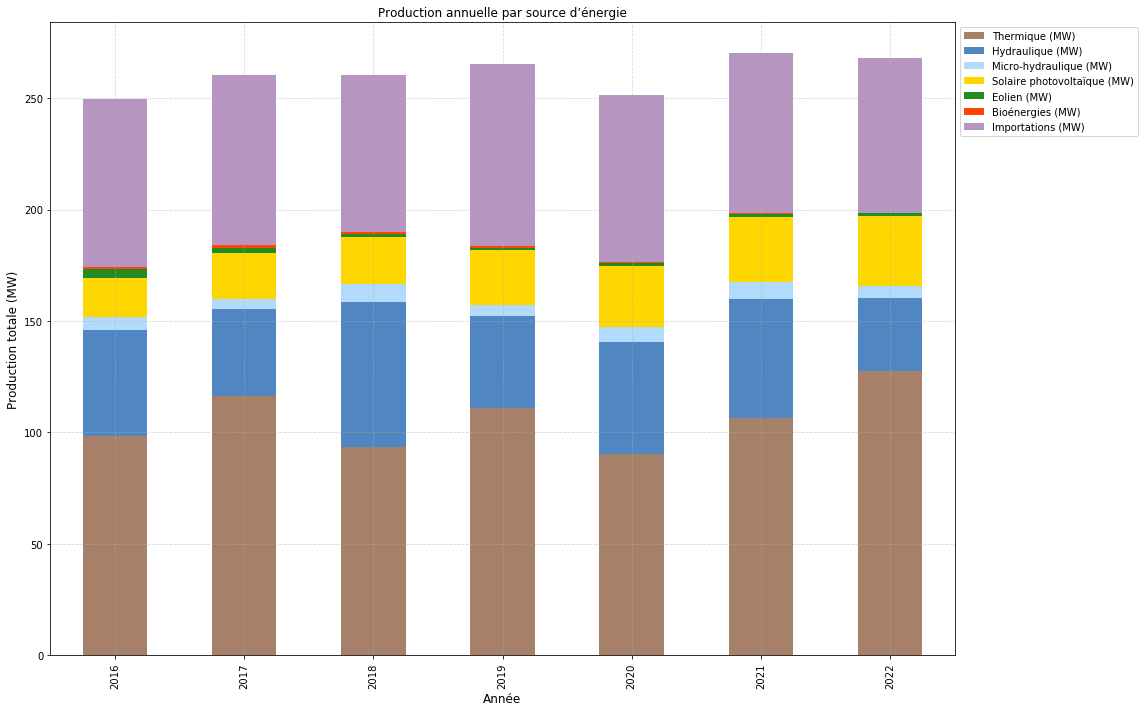

In [12]:
#2

df_moyenne_annuelle_2 = dfData.drop(['Production totale (MW)','Territoire','Coût moyen de production (€/MWh)'],axis=1).set_index('Année').groupby("Année").mean(numeric_only=True)

col = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']
plt.figure(figsize=(16, 10))
ax = (df_moyenne_annuelle_2).plot.bar(stacked=True, figsize=(16, 10),color=col, rot=90) 
ax.set_title("Production annuelle par source d’énergie",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel("Production totale (MW)", fontsize=12) # Production totale 
plt.xlabel("Année", fontsize=12) # Année
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Production annuelle par source d’énergie')
ax.plot()

# Graphe / Tableau de la production par h des sources d'énergies

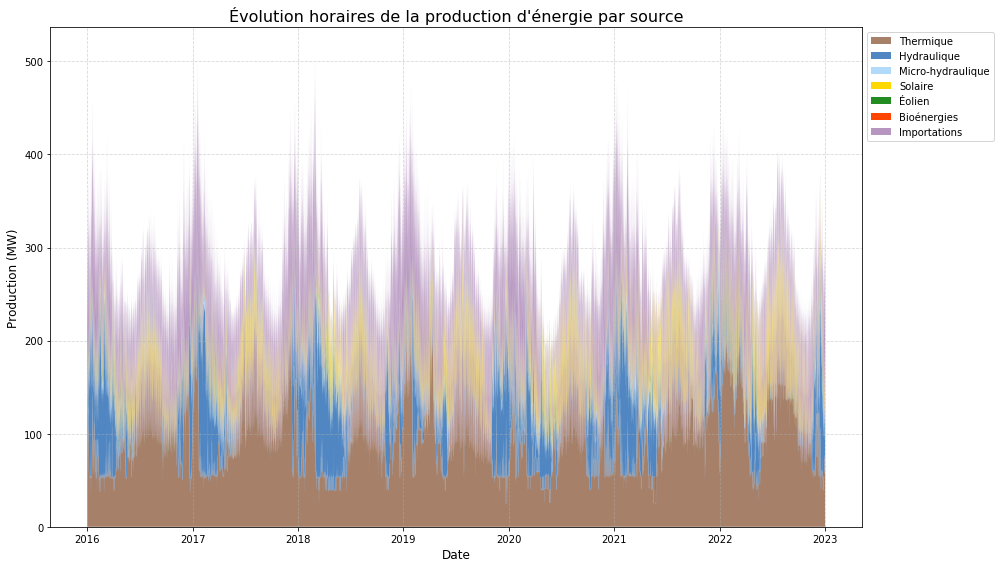

In [13]:

 
colonnes_source = {
    "Thermique": 'Thermique (MW)',
    "Hydraulique": 'Hydraulique (MW)',
    "Micro-hydraulique": 'Micro-hydraulique (MW)',
    "Solaire": 'Solaire photovoltaïque (MW)',
    "Éolien": 'Eolien (MW)',
    "Bioénergies": 'Bioénergies (MW)', 
    "Importations": 'Importations (MW)'
}

couleurs = {
    "Thermique": '#a68069',
    "Hydraulique": '#5086c1',
    "Micro-hydraulique": '#b2dafa',
    "Solaire": '#FFD700',
    "Éolien": '#228B22',
    "Bioénergies": '#FF4500',
    "Importations": '#b695c0'
}



sources_2 = {
    nom: pd.to_numeric(dfData[colonnes_source[nom]], errors='coerce').fillna(0)
    for nom in colonnes_source
}

plt.figure(figsize=(14, 8))
plt.stackplot(
    dfData.index,
    *[sources_2[nom] for nom in sources_2],
    labels=sources_2.keys(),
    colors=[couleurs[nom] for nom in sources_2]
)
plt.title("Évolution horaire de la production d'énergie par source", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Production (MW)", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("production_horaire_aires_empilees.png", dpi=300, bbox_inches='tight')
plt.show()

# Graphe / Tableau de la production moyenne par saison des sources d'énergies

In [14]:
# Data frame par saison

#Saisons - séparation
def get_saison(date):
    mois = date.month
    if mois in [12, 1, 2]:
        return "Hiver"
    elif mois in [3, 4, 5]:
        return "Printemps"
    elif mois in [6, 7, 8]:
        return "Été"
    else:
        return "Automne"
# Indexation pour ajouter les saisons dans le tableau

dfData["Saison"] = dfData.index.map(get_saison)



#dfData

In [15]:
# Tableau moyenne SAISON
df_saison=dfData.drop(['Territoire','Coût moyen de production (€/MWh)','Année','Production totale (MW)'],axis=1).set_index('Saison').groupby("Saison").mean(numeric_only=True)
df_saison

Thermique (MW)  Hydraulique (MW)  Micro-hydraulique (MW)  \
Saison                                                                
Automne        106.318582         26.340026                2.766620   
Hiver          105.317946         83.967101                9.894327   
Printemps       77.322652         64.888931               10.665353   
Été            135.596651         13.571504                1.719285   

           Solaire photovoltaïque (MW)  Eolien (MW)  Bioénergies (MW)  \
Saison                                                                  
Automne                      21.094129     1.421116          0.698571   
Hiver                        15.299976     2.344374          0.718861   
Printemps                    27.332073     2.131540          0.825688   
Été                          34.181944     1.286485          0.761373   

           Importations (MW)  
Saison                        
Automne            69.116545  
Hiver              97.842550  
Printemps          61.282446  
Été                69.195588

[]

<Figure size 1152x720 with 0 Axes>

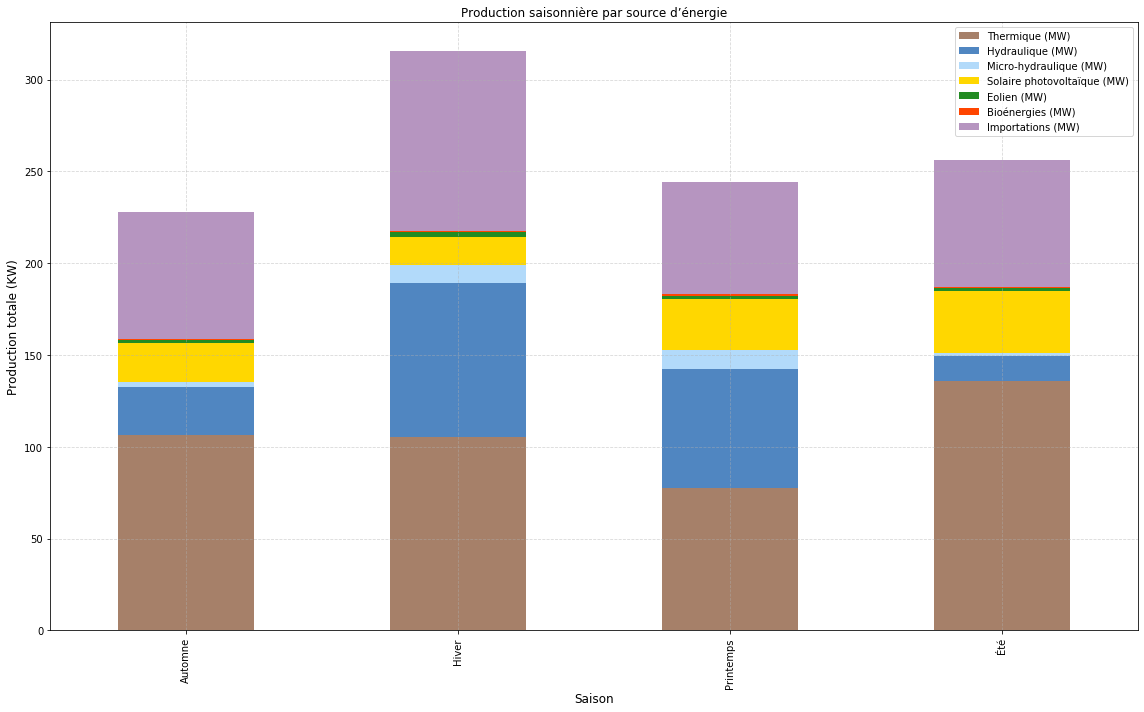

In [16]:
col = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']
plt.figure(figsize=(16, 10))
ax = (df_saison).plot.bar(stacked=True, figsize=(16, 10),color=col, rot=90) 
ax.set_title("Production saisonnière par source d’énergie",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel("Production totale (KW)", fontsize=12) # Production totale 
plt.xlabel("Saison", fontsize=12) # saison
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Production saisonnière par source d’énergie", dpi=300, bbox_inches='tight')
ax.plot()

# Graphe / Tableau de la production mensuelle moyenne d’énergie par source entre 2016 et 2022

In [17]:

dfclean = dfData.copy()

# Ajouter le nom du mois en anglais abrégé
dfclean['Mois'] = dfclean.index.strftime('%b')  # ex: 'Jan', 'Feb', ...

#en minuscule
#dftest['Mois'] = dftest['Mois'].str.lower()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

dfclean['Mois'] = pd.Categorical(dfclean['Mois'], categories=month_order, ordered=True)
dfclean = dfclean.sort_values('Mois')

In [18]:
dfclean

Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 00:00:00+00:00      Corse  Validé              289.130663   
2018-01-01 07:00:00+00:00      Corse  Validé              258.058032   
2018-01-01 06:00:00+00:00      Corse  Validé              250.330295   
2018-01-01 05:00:00+00:00      Corse  Validé              244.987619   
2018-01-01 04:00:00+00:00      Corse  Validé              241.292681   
...                              ...     ...                     ...   
2017-12-22 13:00:00+00:00      Corse  Validé              350.284667   
2017-12-22 14:00:00+00:00      Corse  Validé              342.799333   
2017-12-22 15:00:00+00:00      Corse  Validé              350.665833   
2017-12-22 17:00:00+00:00      Corse  Validé              419.699333   
2022-12-31 22:00:00+00:00      Corse  Estimé              285.950000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2018-01-01 07:00:00+00:00       56.325743         81.842450   
2018-01-01 06:00:00+00:00       56.431011         77.648959   
2018-01-01 05:00:00+00:00       56.403197         80.627778   
2018-01-01 04:00:00+00:00       55.908683         75.731629   
...                                   ...               ...   
2017-12-22 13:00:00+00:00      149.988000         49.194000   
2017-12-22 14:00:00+00:00      149.865000         46.721000   
2017-12-22 15:00:00+00:00      152.860000         48.160000   
2017-12-22 17:00:00+00:00      157.803000        111.036000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2018-01-01 07:00:00+00:00               11.451231   
2018-01-01 06:00:00+00:00               11.279231   
2018-01-01 05:00:00+00:00               11.655231   
2018-01-01 04:00:00+00:00               11.639231   
...                                           ...   
2017-12-22 13:00:00+00:00                4.610000   
2017-12-22 14:00:00+00:00                4.556000   
2017-12-22 15:00:00+00:00                4.451000   
2017-12-22 17:00:00+00:00                4.522000   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756      0.21459   
2018-01-01 07:00:00+00:00                     3.186745      4.87200   
2018-01-01 06:00:00+00:00                    -0.281581      4.60400   
2018-01-01 05:00:00+00:00                    -0.255605      4.03400   
2018-01-01 04:00:00+00:00                    -0.257683      5.45000   
...                                                ...          ...   
2017-12-22 13:00:00+00:00                    48.134500      0.13000   
2017-12-22 14:00:00+00:00                    24.523167      0.06900   
2017-12-22 15:00:00+00:00                     4.220500      0.01100   
2017-12-22 17:00:00+00:00                    -0.277000     -0.01700   
2022-12-31 22:00:00+00:00                    -0.460000      0.10000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 00:00:00+00:00          1.829167         117.392059   
2018-01-01 07:00:00+00:00          0.896000          99.483864   
2018-01-01 06:00:00+00:00          0.896000          99.752675   
2018-01-01 05:00:00+00:00          0.896000          91.627018   
2018-01-01 04:00:00+00:00          0.896000          91.924821   
...                                     ...                ...   
2017-12-22 13:00:00+00:00          1.290167          96.938000   
2017-12-22 14:00:00+00:00          1.290167         115.77500

In [19]:
#MOYENNE PAR MOIS
df_mois=dfclean.drop(['Territoire','Coût moyen de production (€/MWh)','Année','Saison'],axis=1).set_index('Mois').groupby("Mois").mean(numeric_only=True)
df_mois

Production totale (MW)  Thermique (MW)  Hydraulique (MW)  \
Mois                                                             
Jan               333.054541      119.376444         77.896870   
Feb               306.930145       95.168906         88.605980   
Mar               283.595688       86.557407         78.281366   
Apr               240.024256       80.426130         58.188044   
May               209.551694       65.077437         57.970940   
Jun               223.215971      104.494307         19.295158   
Jul               268.358668      144.677172         10.226599   
Aug               276.293678      156.615171         11.377390   
Sep               225.786263      122.151416         10.901419   
Oct               207.035467       99.240767         16.242547   
Nov               251.118881       97.793873         52.204680   
Dec               305.427508      100.518942         85.804976   

      Micro-hydraulique (MW)  Solaire photovoltaïque (MW)  Eolien (MW)  \
Mois                                                                     
Jan                 8.919588                    13.734133     2.624000   
Feb                10.471331                    19.562769     2.486167   
Mar                10.891182                    24.266337     2.027353   
Apr                11.054637                    28.219662     2.378393   
May                10.062626                    29.541205     1.996918   
Jun                 4.704808                    33.164452     1.274941   
Jul                 0.703901                    35.908629     1.363853   
Aug                -0.154548                    33.439930     1.220288   
Sep                 0.152125                    27.582379     0.992665   
Oct                 1.808335                    21.519544     1.347694   
Nov                 6.370582                    14.166620     1.925379   
Dec                10.342670                    12.975820     1.935292   

      Bioénergies (MW)  Importations (MW)  
Mois                                       
Jan           0.877448         109.626511  
Feb           0.745909          89.889488  
Mar           0.820002          80.752367  
Apr           0.825411          58.932398  
May           0.831647          44.071811  
Jun           0.757968          59.525013  
Jul           0.789623          74.689969  
Aug           0.736418          73.059829  
Sep           0.739319          63.267507  
Oct           0.751281          66.125375  
Nov           0.603396          78.054084  
Dec           0.535558          93.314431

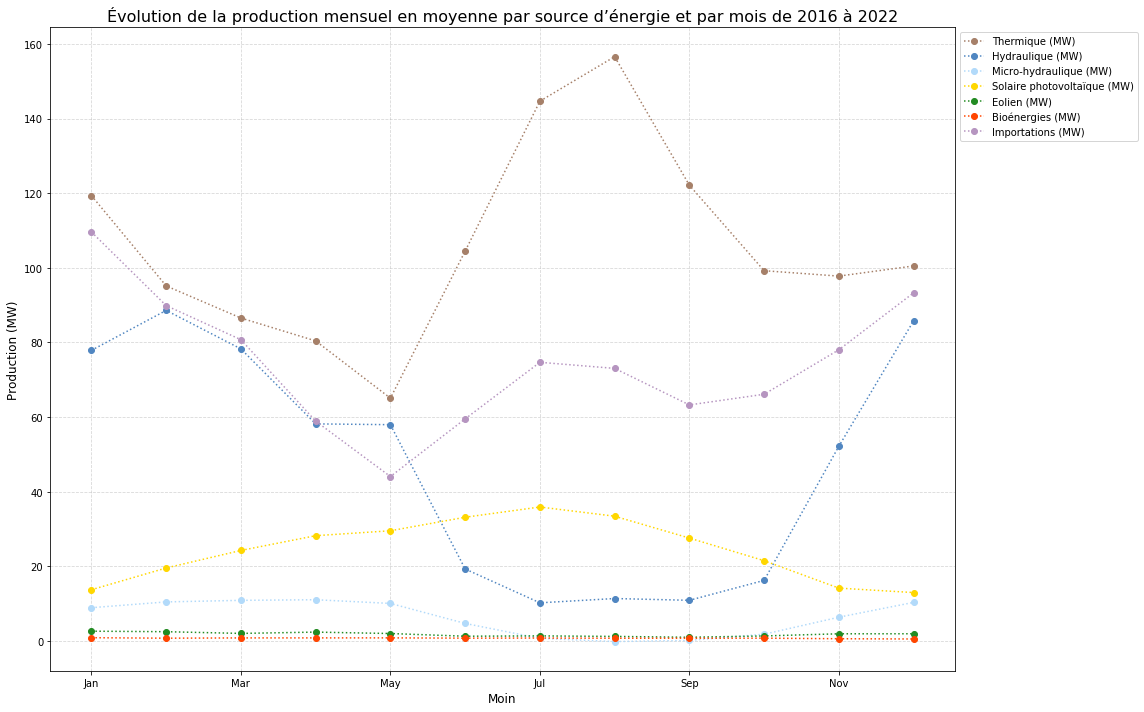

In [20]:
# graphe prod par mois moyenne (2016 à 2022)


df_mois.drop(['Production totale (MW)'],axis=1).plot(figsize=(16, 10),color=col,style='o:')
plt.title("Production mensuelle moyenne d’énergie par source entre 2016 et 2022", fontsize=16)
plt.xlabel("Moin", fontsize=12)
plt.ylabel("Production (MW)", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Production mensuelle moyenne d’énergie par source entre 2016 et 2022", dpi=300, bbox_inches='tight')
plt.show()

# Graphe / Tableau de la production horaire par source d’énergie par saison de 2016 à 2022

In [58]:
df_hour=dfData

In [64]:
df_hour["Heure"] = df_hour.index.hour
df_hour_saison=df_hour.drop(['Territoire','Coût moyen de production (€/MWh)','Année','Production totale (MW)'],axis=1).set_index('Saison').groupby(["Saison", "Heure"]).mean(numeric_only=True)


In [65]:
df_hour_saison

Thermique (MW)  Hydraulique (MW)  Micro-hydraulique (MW)  \
Saison  Heure                                                             
Automne 0           86.696261         17.585956                2.779431   
        1           84.006429         16.089676                2.727176   
        2           83.238424         15.815677                2.710604   
        3           83.863147         16.321075                2.673654   
        4           88.873374         18.586694                2.656444   
...                       ...               ...                     ...   
Été     19         178.909391         35.173587                1.669721   
        20         177.233255         36.010991                1.690887   
        21         160.975372         19.608578                1.699477   
        22         139.258175          9.417760                1.718441   
        23         112.874907          4.598270                1.767677   

               Solaire photovoltaïque (MW)  Eolien (MW)  Bioénergies (MW)  \
Saison  Heure                                                               
Automne 0                        -0.439104     1.367396          0.706755   
        1                        -0.454105     1.351415          0.705529   
        2                        -0.452882     1.349543          0.692950   
        3                        -0.452834     1.369242          0.686633   
        4                        -0.412901     1.372994          0.681820   
...                                    ...          ...               ...   
Été     19                        0.961982     1.341723          0.788923   
        20                       -0.270625     1.292787          0.787271   
        21                       -0.243532     1.270473          0.784886   
        22                       -0.380332     1.255372          0.781712   
        23                       -0.430861     1.219277          0.775641   

               Importations (MW)  
Saison  Heure                     
Automne 0              68.052040  
        1              61.718575  
        2              59.713591  
        3              63.607578  
        4              72.262408  
...                          ...  
Été     19             75.008949  
        20             74.890185  
        21             88.089055  
        22             90.735548  
        23             82.905219  

[96 rows x 7 columns]

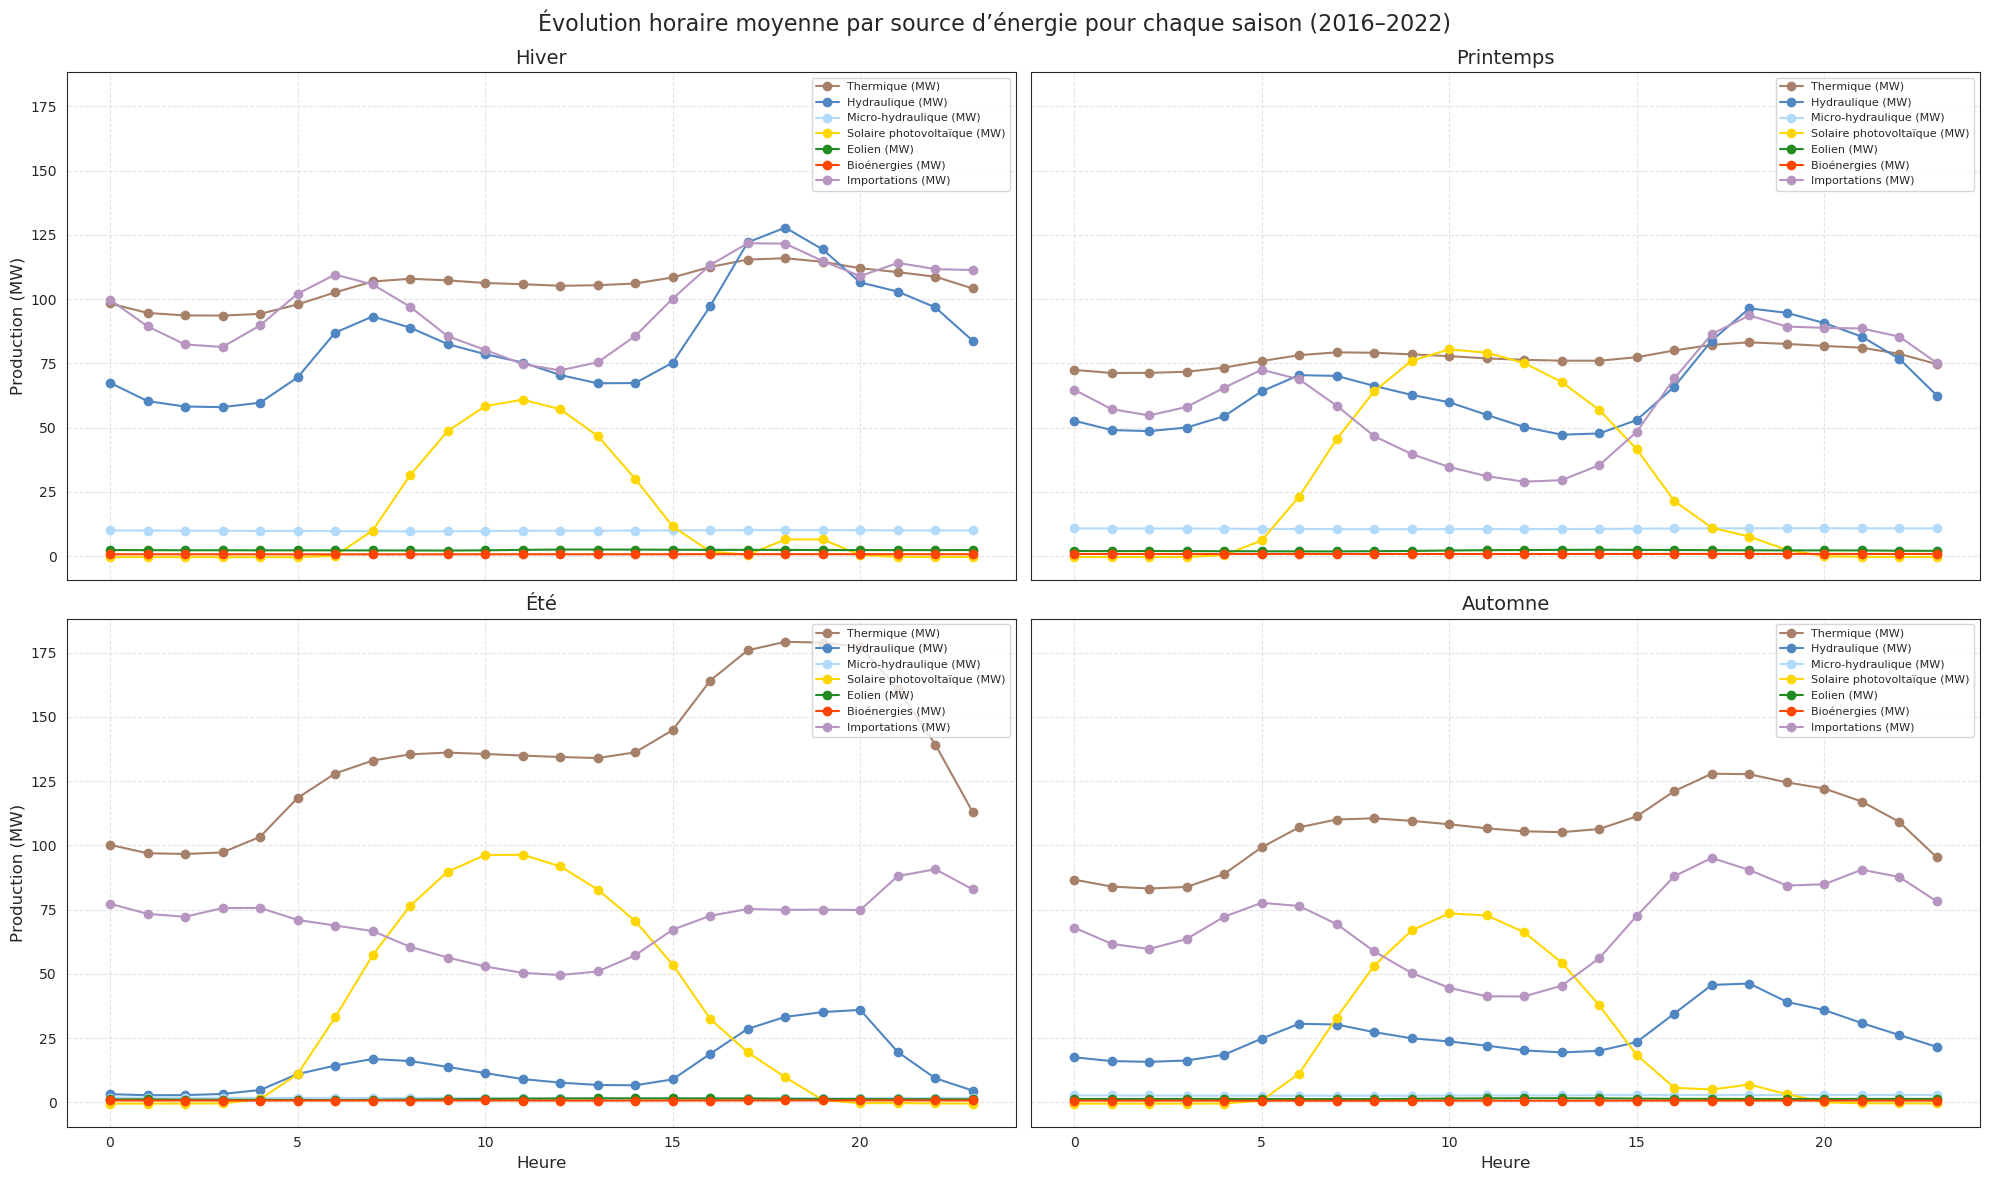

In [67]:
saisons = ['Hiver', 'Printemps', 'Été', 'Automne']

# 4 sous-graphiques

fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten() 

for i, saison in enumerate(saisons):
    # Extraire les données pour la saison
    df_saison = df_hour_saison.loc[saison]

    # Tracé pour cette saison
    df_saison.plot(ax=axes[i], color=col, style='o-')
    axes[i].set_title(f"{saison}", fontsize=14)
    axes[i].set_xlabel("Heure", fontsize=12)
    axes[i].set_ylabel("Production (MW)", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].legend(loc='upper right', fontsize=8)
fig.suptitle("Production d’énergie moyenne par heure et par source, selon la saison (2016–2022)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # pour laisser de la place au titre
plt.savefig("Production d’énergie moyenne par heure et par source, selon la saison (2016–2022).png", dpi=300, bbox_inches='tight')
plt.show()

# Graphe / Tableau de la production d’énergie par source à 8h le 1er de chaque mois, par saison (2016–2022)

In [25]:
df_1=dfData.loc[ (dfData.index.day==1) & (dfData.index.hour==8)]
df_1

Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 08:00:00+00:00      Corse  Validé              256.791391   
2016-02-01 08:00:00+00:00      Corse  Validé              304.193262   
2016-03-01 08:00:00+00:00      Corse  Validé              316.695065   
2016-04-01 08:00:00+00:00      Corse  Validé              261.042551   
2016-05-01 08:00:00+00:00      Corse  Validé              242.367288   
...                              ...     ...                     ...   
2022-08-01 08:00:00+00:00      Corse  Estimé              350.880000   
2022-09-01 08:00:00+00:00      Corse  Estimé              304.320000   
2022-10-01 08:00:00+00:00      Corse  Estimé              233.720000   
2022-11-01 08:00:00+00:00      Corse  Estimé              214.460000   
2022-12-01 08:00:00+00:00      Corse  Estimé              286.200000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 08:00:00+00:00      129.257341          3.098919   
2016-02-01 08:00:00+00:00       55.216740        117.538274   
2016-03-01 08:00:00+00:00       57.777908        158.460776   
2016-04-01 08:00:00+00:00       53.200106        145.515790   
2016-05-01 08:00:00+00:00       79.093985         36.389261   
...                                   ...               ...   
2022-08-01 08:00:00+00:00      164.850000         13.480000   
2022-09-01 08:00:00+00:00      137.820000         -1.040000   
2022-10-01 08:00:00+00:00       87.340000         23.910000   
2022-11-01 08:00:00+00:00      145.210000          1.780000   
2022-12-01 08:00:00+00:00      121.920000         89.120000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 08:00:00+00:00                4.772676   
2016-02-01 08:00:00+00:00               10.695753   
2016-03-01 08:00:00+00:00               15.854236   
2016-04-01 08:00:00+00:00               14.125228   
2016-05-01 08:00:00+00:00                5.234608   
...                                           ...   
2022-08-01 08:00:00+00:00                0.066000   
2022-09-01 08:00:00+00:00               -0.023000   
2022-10-01 08:00:00+00:00                5.223000   
2022-11-01 08:00:00+00:00                0.209000   
2022-12-01 08:00:00+00:00               14.198860   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 08:00:00+00:00                    10.276487     0.595423   
2016-02-01 08:00:00+00:00                    32.604883     0.886668   
2016-03-01 08:00:00+00:00                    41.060427    -2.002190   
2016-04-01 08:00:00+00:00                    13.561984     4.027887   
2016-05-01 08:00:00+00:00                    58.398273     8.028809   
...                                                ...          ...   
2022-08-01 08:00:00+00:00                   100.540000    -0.020000   
2022-09-01 08:00:00+00:00                    87.190000     0.190000   
2022-10-01 08:00:00+00:00                    98.300000     1.290000   
2022-11-01 08:00:00+00:00                    63.370000    -0.020000   
2022-12-01 08:00:00+00:00                     9.590000     0.230000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 08:00:00+00:00          1.828500         106.962045   
2016-02-01 08:00:00+00:00          1.450404          85.800540   
2016-03-01 08:00:00+00:00          1.578863          43.965046   
2016-04-01 08:00:00+00:00          0.706143          29.905412   
2016-05-01 08:00:00+00:00          1.264760          53.957592   
...                                     ...                ...   
2022-08-01 08:00:00+00:00          0.330000          71.641112   
2022-09-01 08:00:00+00:00          0.300000          79.90036

In [26]:
# Tableau moyenne du 1er du mois à 8h par saison
df_saison_le_01_à_8h = df_1.drop(['Territoire','Production totale (MW)','Coût moyen de production (€/MWh)','Année'],axis=1).set_index('Saison').groupby("Saison").mean(numeric_only=True)
df_saison_le_01_à_8h

Thermique (MW)  Hydraulique (MW)  Micro-hydraulique (MW)  \
Saison                                                                
Automne        111.701441         18.904213                1.295765   
Hiver          100.725807         72.131931                9.828504   
Printemps       82.693307         77.274463               10.896712   
Été            124.774406         23.529503                3.232992   

           Solaire photovoltaïque (MW)  Eolien (MW)  Bioénergies (MW)  \
Saison                                                                  
Automne                      62.556528     1.265783          0.717937   
Hiver                        27.732551     2.291396          0.667511   
Printemps                    52.130605     2.845670          0.891790   
Été                          78.430990     1.989949          0.771024   

           Importations (MW)  
Saison                        
Automne            48.749528  
Hiver             102.216916  
Printemps          55.058949  
Été                50.286228

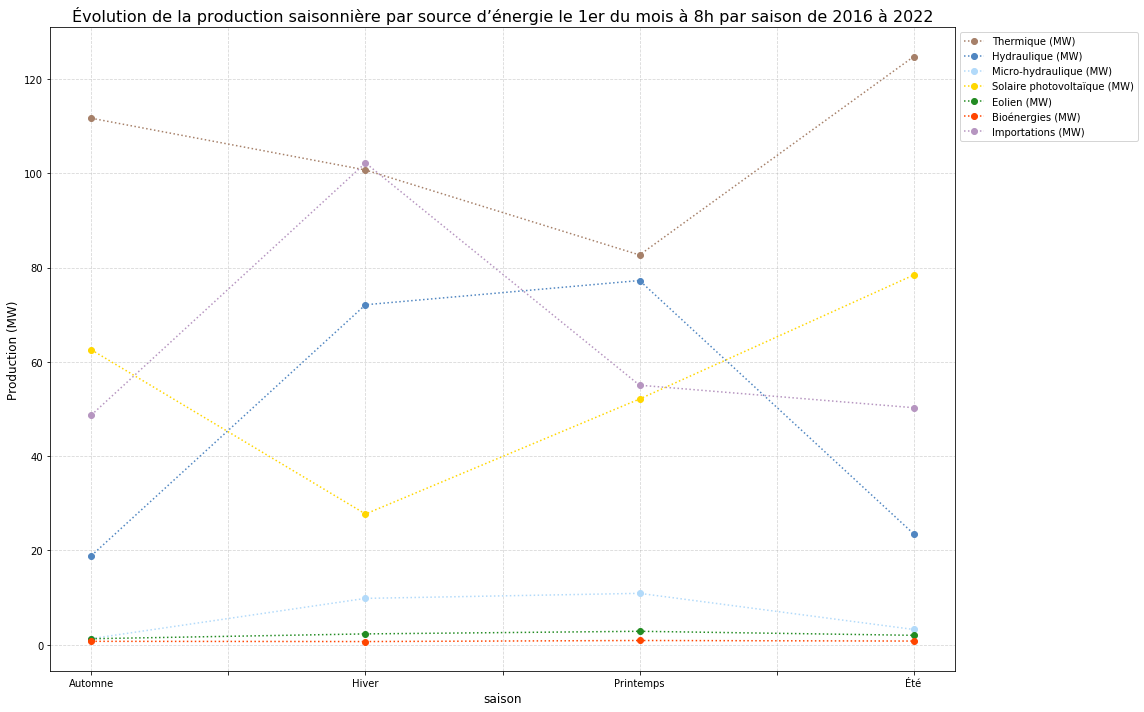

In [27]:
# Evolution horaire sur une journée type par saison
 #le 1er à 8h de 2016 à 2022


df_saison_le_01_à_8h.plot(figsize=(16, 10),color=col,style='o:')
plt.title("Production d’énergie par source à 8h le 1er de chaque mois, par saison (2016–2022)", fontsize=16)
plt.xlabel("saison", fontsize=12)
plt.ylabel("Production (MW)", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Production d’énergie par source à 8h le 1er de chaque mois, par saison (2016–2022)", dpi=300, bbox_inches='tight')
plt.show()

# Graphe de la part moyenne de chaque source d’énergie dans la production totale

In [28]:
# colors_chart = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']
# labels_chart= [r'Thermique (MW) (40.70%)', r'Hydraulique (MW) (18.05%)', r'Micro-hydraulique (MW) (2.40%)', r'Solaire photovoltaïque (MW) (9.41%)', r'Eolien (MW) (0.69%)', r'Bioénergies (MW) (0.29%)', r'Importations (MW) (28.47%)']#custom

colors_chart = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']
sns.set_palette(colors_chart)

territoire = dfData['Territoire']
statut = dfData['Statut']
production_totale = dfData['Production totale (MW)']
thermique = dfData['Thermique (MW)']
hydraulique = dfData['Hydraulique (MW)']
micro_hydraulique = dfData['Micro-hydraulique (MW)']
solaire = dfData['Solaire photovoltaïque (MW)']
eolien = dfData['Eolien (MW)']
bioenergies = dfData['Bioénergies (MW)']
importations = dfData['Importations (MW)']
cout_moyen = dfData['Coût moyen de production (€/MWh)']

colonnes = {
    "Thermique (MW)": thermique,
    "Hydraulique (MW)": hydraulique,
    "Micro-hydraulique (MW)": micro_hydraulique,
    "Solaire photovoltaïque (MW)": solaire,
    "Eolien (MW)": eolien,
    "Bioénergies (MW)": bioenergies,
    "Importations (MW)": importations,
    "Production totale (MW)": production_totale,
    "Coût moyen de production (€/MWh)": cout_moyen,
}


moyennes = {}
ecarts_types = {}
minimums = {}
maximums = {}
etendues = {}

for nom, variable in colonnes.items():
    serie = pd.to_numeric(variable, errors='coerce').dropna()
    if not serie.empty:
        moy = serie.mean()
        std = serie.std()
        min_val = serie.min()
        max_val = serie.max()
        etendue = max_val - min_val

        # Stockage des résultats
        moyennes[nom] = moy
        ecarts_types[nom] = std
        minimums[nom] = min_val
        maximums[nom] = max_val
        etendues[nom] = etendue

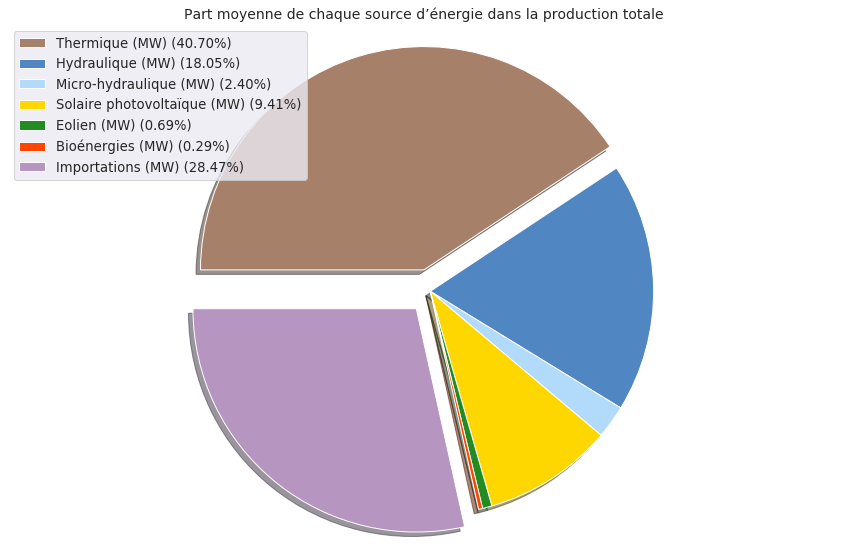

In [29]:
# Tracer du pie chart part moyenne
sns.set(font_scale = 1.2)
moyennes.pop("Production totale (MW)", None) # exclure "Production totale"
moyennes.pop("Coût moyen de production (€/MWh)", None) # exclure "Coût moyen"

labels = list(moyennes.keys())
valeurs = list(moyennes.values())

sns.set(font_scale = 1.2)
colors_chart = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']
labels_chart= [r'Thermique (MW) (40.70%)', r'Hydraulique (MW) (18.05%)', r'Micro-hydraulique (MW) (2.40%)', r'Solaire photovoltaïque (MW) (9.41%)', r'Eolien (MW) (0.69%)', r'Bioénergies (MW) (0.29%)', r'Importations (MW) (28.47%)']#custom
valeurs = list(moyennes.values())
plt.figure(figsize=(12,8))
patches,text = plt.pie(valeurs, colors=colors_chart, startangle=180, shadow=True,counterclock=False, explode=[0.1,0,0,0,0,0,0.1])
plt.title("Part moyenne de chaque source d’énergie dans la production totale", fontsize=14)
plt.axis('equal', fontsize=12)  # Cercle parfait

    
plt.legend(patches, labels=labels_chart, loc="best")
plt.savefig('Pie_Chart-Part moyenne de chaque source d’énergie dans la production totale-2', dpi=100, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Part moyenne de chaque source d’énergie dans la production totale par an

In [30]:
# Def de fonction pour tracer chaque pie chart

# Configuration de base
sns.set(font_scale = 1.2) #police seaborn
colors_chart = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']

# Fonction pour créer les labels avec pourcentages
def create_labels_with_percentages(values, source_names):
    total = sum(values) #somme totale de toutes les valeurs pour pouvoir calculer les pourcentages de chaque source.
    labels = []
    # zip() : associe chaque source (nom) avec sa valeur correspondante
    #enumerate () : fournit un index pour chaque élément
    for i, (name, value) in enumerate(zip(source_names, values)): #traite simultanément le nom et la valeur de chaque source
        percentage = (value / total) * 100
        labels.append(f'{name} ({percentage:.2f}%)') #pour avoir le label avec nom de la source + pourcentage et avec 2f on a juste 2 décimales
    return labels

# Fonction pour créer un pie chart avec paramètres déja choisi
def create_pie_chart(values, labels, title, filename, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    patches, text = plt.pie(
        values, 
        colors=colors_chart[:len(values)], 
        startangle=180, 
        shadow=True, # les ombres (pour le style)
        counterclock=False, 
        explode=[0.1 if i == 0 or i == len(values)-1 else 0 for i in range(len(values))] # pour faire les séparations thermique / importations / ENR
    )
    plt.title(title, fontsize=14)
    plt.axis('equal') #cercle parfait
    plt.legend(patches, labels, loc="best") #loc=best : meilleure position de la légende
    plt.tight_layout()
    plt.savefig(filename, dpi=100, bbox_inches='tight') #bbox_inches='tight' : Supprime les espaces blancs inutiles
    plt.show()

tous les pie charts de 2016 à 2022


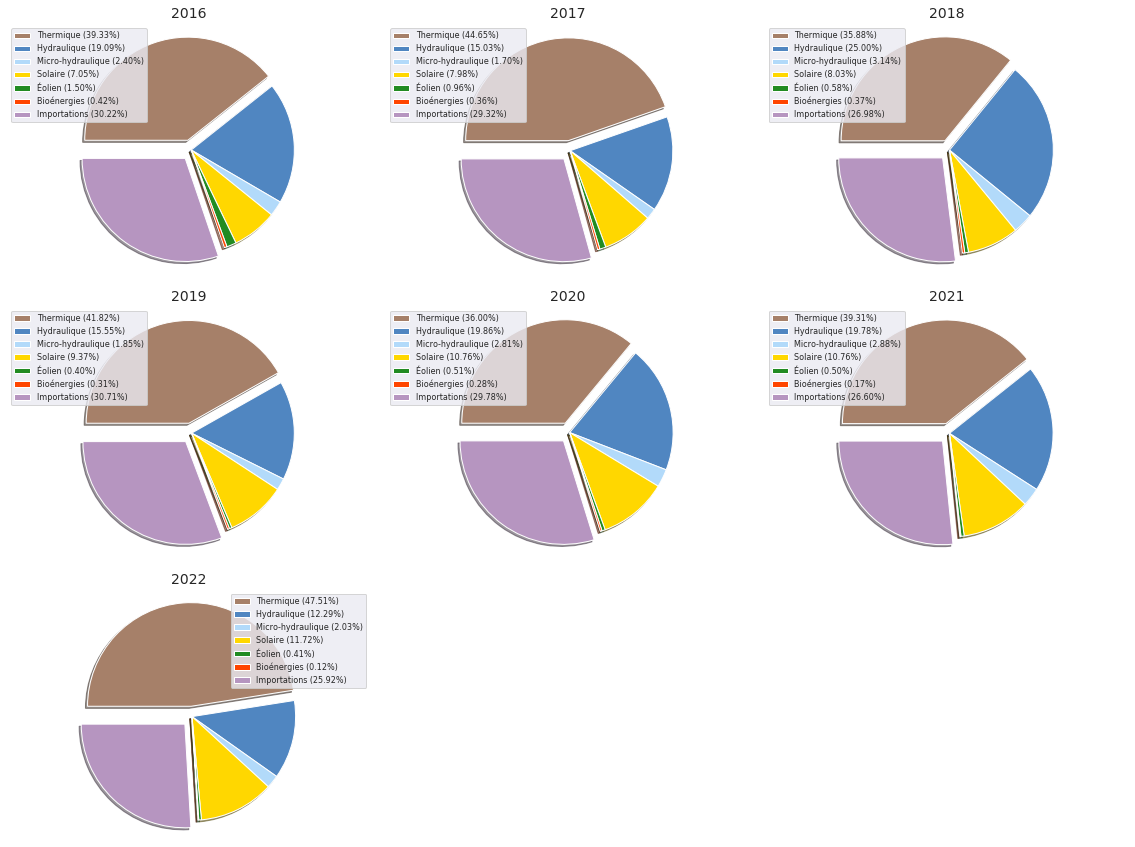

In [31]:

# Configuration de base
sns.set(font_scale=1.2)
colors_chart = ['#a68069','#5086c1','#b2dafa','#FFD700','#228B22','#FF4500','#b695c0']

# Fonction pour créer les labels avec pourcentages
def create_labels_with_percentages(values, source_names):
    total = sum(values)
    labels = []
    for i, (name, value) in enumerate(zip(source_names, values)):
        percentage = (value / total) * 100
        labels.append(f'{name} ({percentage:.2f}%)')
    return labels

# Afficher tous les pie charts dans un seul graphe (grille)
print("tous les pie charts de 2016 à 2022")
annees_uniques = sorted(dfData['Année'].unique())
n_cols = 3
n_rows = (len(annees_uniques) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, annee in enumerate(annees_uniques):
    df_annee = dfData[dfData['Année'] == annee]
    moyennes_annee = {nom: df_annee[colonnes_source[nom]].mean() for nom in sources_2}
    valeurs_annee = list(moyennes_annee.values())
    noms_sources = list(sources_2.keys())
    labels_annee = create_labels_with_percentages(valeurs_annee, noms_sources)

    ax = axes[i]
    wedges, texts = ax.pie(
        valeurs_annee,
        colors=colors_chart[:len(valeurs_annee)],
        startangle=180,
        shadow=True,
        counterclock=False,
        explode=[0.1 if j == 0 or j == len(valeurs_annee)-1 else 0 for j in range(len(valeurs_annee))]
    )
    ax.set_title(f"{annee}", fontsize=14)
    ax.axis('equal')
    ax.legend(wedges, labels_annee, loc="best", fontsize=8)

# Cacher les sous-graphiques inutilisés
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("tous les pie charts de 2016 à 2022.png", dpi=100, bbox_inches='tight')
plt.show()


# Part moyenne de chaque source d’énergie dans la production totale par saison

pie charts par saison (Hiver, Printemps, Été, Automne) de 2016 à 2022


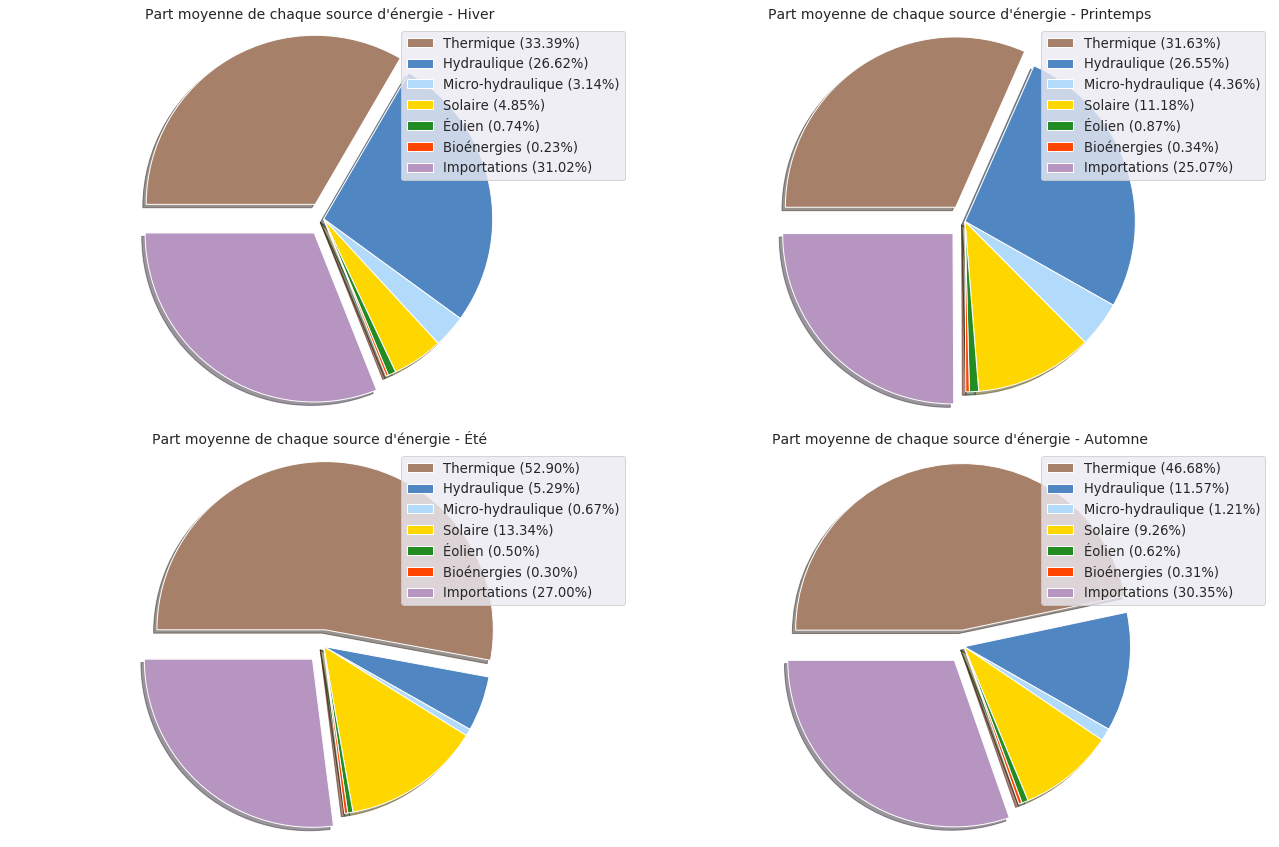

In [32]:
print("pie charts par saison (Hiver, Printemps, Été, Automne) de 2016 à 2022")
ordre_saisons = ["Hiver", "Printemps", "Été", "Automne"]

# Configuration de la figure
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

for i, saison in enumerate(ordre_saisons):
    # Filtrer les données pour la saison
    df_saison = dfData[dfData['Saison'] == saison]

    # Calculer les moyennes pour cette saison
    moyennes_saison = {}
    for nom in sources_2:
        moyennes_saison[nom] = df_saison[colonnes_source[nom]].mean()

    # Créer les labels et valeurs
    valeurs_saison = list(moyennes_saison.values())
    noms_sources = list(sources_2.keys())
    labels_saison = create_labels_with_percentages(valeurs_saison, noms_sources)

    # Tracer le pie chart sur le subplot correspondant
    patches, _ = axs[i].pie(
        valeurs_saison,
        colors=colors_chart[:len(valeurs_saison)],
        startangle=180,
        shadow=True,
        counterclock=False,
        explode=[0.1 if j == 0 or j == len(valeurs_saison) - 1 else 0 for j in range(len(valeurs_saison))]
    )
    axs[i].set_title(f"Part moyenne de chaque source d'énergie - {saison}", fontsize=14)
    axs[i].axis('equal')
    axs[i].legend(patches, labels_saison, loc="best")

plt.tight_layout()
plt.savefig("tous les pie charts de 2016 à 2022_Saisons.png", dpi=100, bbox_inches='tight')
plt.show()


# Corrélation : Spearman et test t de Student

In [33]:
from scipy import stats
from scipy.stats import spearmanr, ttest_ind, ttest_rel, shapiro, normaltest, levene

In [34]:
dfData

Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 00:00:00+00:00      Corse  Validé              289.130663   
2016-01-01 01:00:00+00:00      Corse  Validé              262.482111   
2016-01-01 02:00:00+00:00      Corse  Validé              241.838194   
2016-01-01 03:00:00+00:00      Corse  Validé              229.216871   
2016-01-01 04:00:00+00:00      Corse  Validé              227.847164   
...                              ...     ...                     ...   
2022-12-31 18:00:00+00:00      Corse  Estimé              300.810000   
2022-12-31 19:00:00+00:00      Corse  Estimé              280.530000   
2022-12-31 20:00:00+00:00      Corse  Estimé              262.500000   
2022-12-31 21:00:00+00:00      Corse  Estimé              271.380000   
2022-12-31 22:00:00+00:00      Corse  Estimé              285.950000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2016-01-01 01:00:00+00:00      147.862507         -1.839914   
2016-01-01 02:00:00+00:00      130.558174         -1.841581   
2016-01-01 03:00:00+00:00      127.444341         -1.839914   
2016-01-01 04:00:00+00:00      124.631841         -1.836581   
...                                   ...               ...   
2022-12-31 18:00:00+00:00       77.150000         64.040000   
2022-12-31 19:00:00+00:00       77.180000         57.510000   
2022-12-31 20:00:00+00:00       76.970000         49.290000   
2022-12-31 21:00:00+00:00       77.410000         43.440000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2016-01-01 01:00:00+00:00                4.861676   
2016-01-01 02:00:00+00:00                4.772676   
2016-01-01 03:00:00+00:00                4.765676   
2016-01-01 04:00:00+00:00                4.778676   
...                                           ...   
2022-12-31 18:00:00+00:00                8.525860   
2022-12-31 19:00:00+00:00                8.751890   
2022-12-31 20:00:00+00:00                8.785650   
2022-12-31 21:00:00+00:00                8.790890   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756     0.214590   
2016-01-01 01:00:00+00:00                    -0.040256     0.215090   
2016-01-01 02:00:00+00:00                    -0.039930     0.216923   
2016-01-01 03:00:00+00:00                    -0.038263     0.208923   
2016-01-01 04:00:00+00:00                    -0.035596     0.202756   
...                                                ...          ...   
2022-12-31 18:00:00+00:00                    10.910000    -0.020000   
2022-12-31 19:00:00+00:00                     9.920000    -0.020000   
2022-12-31 20:00:00+00:00                     0.340000    -0.020000   
2022-12-31 21:00:00+00:00                    -0.480000    -0.010000   
2022-12-31 22:00:00+00:00                    -0.460000     0.100000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 00:00:00+00:00          1.829167         117.392059   
2016-01-01 01:00:00+00:00          1.829500         109.593508   
2016-01-01 02:00:00+00:00          1.829000         106.342931   
2016-01-01 03:00:00+00:00          1.829000          96.847108   
2016-01-01 04:00:00+00:00          1.829000          98.277068   
...                                     ...                ...   
2022-12-31 18:00:00+00:00          0.000000         140.195765   
2022-12-31 19:00:00+00:00          0.000000         127.18576

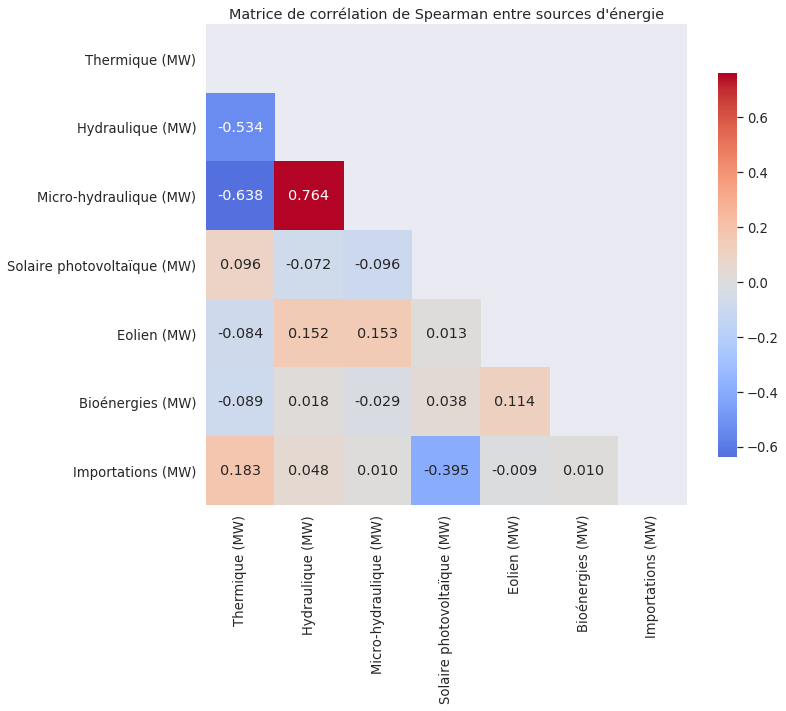

In [35]:
correlation_spear=dfData.drop(['Territoire','Production totale (MW)','Coût moyen de production (€/MWh)','Année','Saison'],axis=1)
correlation_spear

# Calcul des corrélations de Spearman
spearman_corr2 = correlation_spear.corr(method='spearman')

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(spearman_corr2, dtype=bool))
sns.heatmap(spearman_corr2, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation de Spearman entre sources d\'énergie')
plt.tight_layout()
plt.savefig('correlation_spearman_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

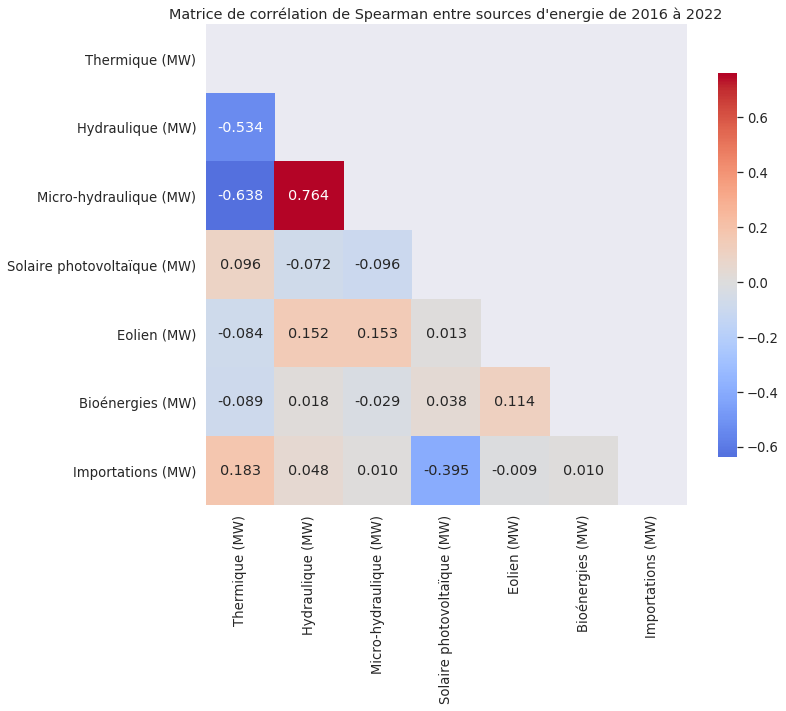

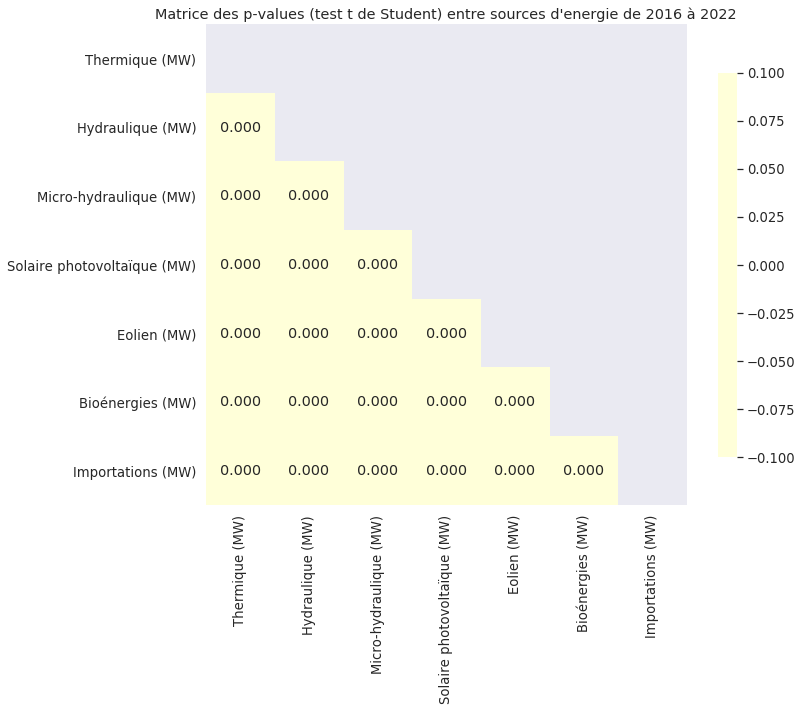

In [36]:


# Calcul de la matrice de corrélation de Spearman
spearman_corr = correlation_spear.corr(method='spearman')

# Initialisation de la matrice des p-values pour le test de Student
student_pvals = pd.DataFrame(np.ones_like(spearman_corr),
                              index=spearman_corr.index,
                              columns=spearman_corr.columns)

# Remplissage de la matrice des p-values avec des tests t
for i in range(len(spearman_corr.columns)):
    for j in range(i+1, len(spearman_corr.columns)):
        col1 = spearman_corr.columns[i]
        col2 = spearman_corr.columns[j]
        
        data1 = correlation_spear[col1].dropna()
        data2 = correlation_spear[col2].dropna()
        common_index = data1.index.intersection(data2.index)
        data1 = data1.loc[common_index]
        data2 = data2.loc[common_index]

        if len(data1) > 2 and len(data2) > 2:
            # Test de Levene pour égalité des variances
            _, p_levene = levene(data1, data2)
            equal_var = p_levene > 0.05

            # Test t de Student
            _, p_value = ttest_ind(data1, data2, equal_var=equal_var)
            student_pvals.loc[col1, col2] = p_value
            student_pvals.loc[col2, col1] = p_value

# Heatmap de la corrélation de Spearman
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
sns.heatmap(spearman_corr, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation de Spearman entre sources d\'energie de 2016 à 2022')
plt.tight_layout()
plt.savefig('correlation_spearman_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Heatmap des p-values du test de Student
plt.figure(figsize=(12, 10))
sns.heatmap(student_pvals, 
            mask=mask,
            annot=True, 
            cmap='YlGnBu', 
            center=0.05,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Matrice des p-values (test t de Student) entre sources d\'energie de 2016 à 2022')
plt.tight_layout()
plt.savefig('student_test_pvalue_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [37]:
df_01 = dfData.drop(['Territoire','Production totale (MW)','Coût moyen de production (€/MWh)','Statut'],axis=1)
df_01

Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2016-01-01 01:00:00+00:00      147.862507         -1.839914   
2016-01-01 02:00:00+00:00      130.558174         -1.841581   
2016-01-01 03:00:00+00:00      127.444341         -1.839914   
2016-01-01 04:00:00+00:00      124.631841         -1.836581   
...                                   ...               ...   
2022-12-31 18:00:00+00:00       77.150000         64.040000   
2022-12-31 19:00:00+00:00       77.180000         57.510000   
2022-12-31 20:00:00+00:00       76.970000         49.290000   
2022-12-31 21:00:00+00:00       77.410000         43.440000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2016-01-01 01:00:00+00:00                4.861676   
2016-01-01 02:00:00+00:00                4.772676   
2016-01-01 03:00:00+00:00                4.765676   
2016-01-01 04:00:00+00:00                4.778676   
...                                           ...   
2022-12-31 18:00:00+00:00                8.525860   
2022-12-31 19:00:00+00:00                8.751890   
2022-12-31 20:00:00+00:00                8.785650   
2022-12-31 21:00:00+00:00                8.790890   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756     0.214590   
2016-01-01 01:00:00+00:00                    -0.040256     0.215090   
2016-01-01 02:00:00+00:00                    -0.039930     0.216923   
2016-01-01 03:00:00+00:00                    -0.038263     0.208923   
2016-01-01 04:00:00+00:00                    -0.035596     0.202756   
...                                                ...          ...   
2022-12-31 18:00:00+00:00                    10.910000    -0.020000   
2022-12-31 19:00:00+00:00                     9.920000    -0.020000   
2022-12-31 20:00:00+00:00                     0.340000    -0.020000   
2022-12-31 21:00:00+00:00                    -0.480000    -0.010000   
2022-12-31 22:00:00+00:00                    -0.460000     0.100000   

                           Bioénergies (MW)  Importations (MW)  Année Saison  
Date                                                                          
2016-01-01 00:00:00+00:00          1.829167         117.392059   2016  Hiver  
2016-01-01 01:00:00+00:00          1.829500         109.593508   2016  Hiver  
2016-01-01 02:00:00+00:00          1.829000         106.342931   2016  Hiver  
2016-01-01 03:00:00+00:00          1.829000          96.847108   2016  Hiver  
2016-01-01 04:00:00+00:00          1.829000          98.277068   2016  Hiver  
...                                     ...                ...    ...    ...  
2022-12-31 18:00:00+00:00          0.000000         140.195765   2022  Hiver  
2022-12-31 19:00:00+00:00          0.000000         127.185765   2022  Hiver  
2022-12-31 20:00:00+00:00          0.000000         127.136375   2022  Hiver  
2022-12-31 21:00:00+00:00          0.000000         142.225765   2022  Hiver  
2022-12-31 22:00:00+00:00          0.000000         148.515765   2022  Hiver  

[61367 rows x 9 columns]

In [38]:
#rappel

def perform_student_test_simplified(group1, group2, group1_name, group2_name):

    # Test d'égalité des variances (Levene)
    stat_levene, p_levene = levene(group1, group2)
    equal_var = p_levene > 0.05
    
    # Test de Student
    t_stat, p_value = ttest_ind(group1, group2, equal_var=equal_var) # voir la fonctioon ttest_ind de scip.stats
    sources=sources_2
    # Statistiques descriptives
    mean1 = np.mean(group1) #moyenne
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # Écart-type
    std2 = np.std(group2, ddof=1)
    n1 = len(group1) #taille du groupe 1
    n2 = len(group2)
    
    return {
        'Groupe_1': group1_name,
        'Groupe_2': group2_name,
        'Moyenne_1': mean1,
        'Moyenne_2': mean2,
        'Ecart_type_1': std1,
        'Ecart_type_2': std2,
        'N_1': n1,
        'N_2': n2,
        'Statistique_t': t_stat,
        'P_value': p_value,
        'Variances_egales': equal_var,
        'Significatif_005': p_value < 0.05,
        'Significatif_001': p_value < 0.01
    }

# Tests entre saisons pour chaque source d'énergie
saisons = ["Hiver", "Printemps", "Été", "Automne"]
results_list = []

for source_name in sources_2.keys():
    #print(f"\nAnalyse pour: {source_name}") #liste des tests fait par sources
    
    # Comparaisons deux à deux entre saisons
    for i, saison1 in enumerate(saisons):
        for saison2 in saisons[i+1:]:
            data1 = df_01[df_01['Saison'] == saison1][colonnes_source[source_name]].dropna()
            data2 = df_01[df_01['Saison'] == saison2][colonnes_source[source_name]].dropna()
            
            if len(data1) > 0 and len(data2) > 0:
                result = perform_student_test_simplified(data1, data2, saison1, saison2)
                result['Source_energie'] = source_name
                result['Comparaison'] = f"{saison1} vs {saison2}"
                results_list.append(result)

# Création du tableau des résultats
df_results = pd.DataFrame(results_list)

# Réorganisation des colonnes (pour une meilleure lisibilité)
columns_order = [
    'Source_energie', 'Comparaison', 'Groupe_1', 'Groupe_2',
    'N_1', 'N_2', 'Moyenne_1', 'Moyenne_2', 'Ecart_type_1', 'Ecart_type_2',
    'Statistique_t', 'P_value', 'Variances_egales', 'Significatif_005', 'Significatif_001'
]

df_results = df_results[columns_order]


# Formatage pour l'affichage
df_results_formatted = df_results.copy()
df_results_formatted['Moyenne_1'] = df_results_formatted['Moyenne_1'].round(2)
df_results_formatted['Moyenne_2'] = df_results_formatted['Moyenne_2'].round(2)
df_results_formatted['Ecart_type_1'] = df_results_formatted['Ecart_type_1'].round(2)
df_results_formatted['Ecart_type_2'] = df_results_formatted['Ecart_type_2'].round(2)
df_results_formatted['Statistique_t'] = df_results_formatted['Statistique_t'].round(4)
df_results_formatted['P_value'] = df_results_formatted['P_value'].round(6)


#print("TABLEAU DES RÉSULTATS - TESTS DE STUDENT")

#print(df_results_formatted.to_string(index=False))
#df_results_formatted


In [39]:
df_results_formatted

Source_energie           Comparaison   Groupe_1   Groupe_2    N_1  \
0           Thermique    Hiver vs Printemps      Hiver  Printemps  15167   
1           Thermique          Hiver vs Été      Hiver        Été  15167   
2           Thermique      Hiver vs Automne      Hiver    Automne  15167   
3           Thermique      Printemps vs Été  Printemps        Été  15460   
4           Thermique  Printemps vs Automne  Printemps    Automne  15460   
5           Thermique        Été vs Automne        Été    Automne  15456   
6         Hydraulique    Hiver vs Printemps      Hiver  Printemps  15167   
7         Hydraulique          Hiver vs Été      Hiver        Été  15167   
8         Hydraulique      Hiver vs Automne      Hiver    Automne  15167   
9         Hydraulique      Printemps vs Été  Printemps        Été  15460   
10        Hydraulique  Printemps vs Automne  Printemps    Automne  15460   
11        Hydraulique        Été vs Automne        Été    Automne  15456   
12  Micro-hydraulique    Hiver vs Printemps      Hiver  Printemps  15167   
13  Micro-hydraulique          Hiver vs Été      Hiver        Été  15167   
14  Micro-hydraulique      Hiver vs Automne      Hiver    Automne  15167   
15  Micro-hydraulique      Printemps vs Été  Printemps        Été  15460   
16  Micro-hydraulique  Printemps vs Automne  Printemps    Automne  15460   
17  Micro-hydraulique        Été vs Automne        Été    Automne  15456   
18            Solaire    Hiver vs Printemps      Hiver  Printemps  15167   
19            Solaire          Hiver vs Été      Hiver        Été  15167   
20            Solaire      Hiver vs Automne      Hiver    Automne  15167   
21            Solaire      Printemps vs Été  Printemps        Été  15460   
22            Solaire  Printemps vs Automne  Printemps    Automne  15460   
23            Solaire        Été vs Automne        Été    Automne  15456   
24             Éolien    Hiver vs Printemps      Hiver  Printemps  15167   
25             Éolien          Hiver vs Été      Hiver        Été  15167   
26             Éolien      Hiver vs Automne      Hiver    Automne  15167   
27             Éolien      Printemps vs Été  Printemps        Été  15460   
28             Éolien  Printemps vs Automne  Printemps    Automne  15460   
29             Éolien        Été vs Automne        Été    Automne  15456   
30        Bioénergies    Hiver vs Printemps      Hiver  Printemps  15167   
31        Bioénergies          Hiver vs Été      Hiver        Été  15167   
32        Bioénergies      Hiver vs Automne      Hiver    Automne  15167   
33        Bioénergies      Printemps vs Été  Printemps        Été  15460   
34        Bioénergies  Printemps vs Automne  Printemps    Automne  15460   
35        Bioénergies        Été vs Automne        Été    Automne  15456   
36       Importations    Hiver vs Printemps      Hiver  Printemps  15167   
37       Importations          Hiver vs Été      Hiver        Été  15167   
38       Importations      Hiver vs Automne      Hiver    Automne  15167   
39       Importations      Printemps vs Été  Printemps        Été  15460   
40       Importations  Printemps vs Automne  Printemps    Automne  15460   
41       Importations        Été vs Automne        Été    Automne  15456   

      N_2  Moyenne_1  Moyenne_2  Ecart_type_1  Ecart_type_2  Statistique_t  \
0   15460     105.32      77.32         48.14         37.75        56.5633   
1   15456     105.32     135.60         48.14         45.19       -56.7239   
2   15284     105.32     106.32         48.14         34.38        -2.0858   
3   15456      77.32     135.60         37.75         45.19      -123.0485   
4   15284      77.32     106.32         37.75         34.38       -70.4297   
5   15284     135.60     106.32         45.19         34.38        63.9712   
6   15460      83.97      64.89         52.20         46.37        33.7895   
7   15456      83.97      13.57         52.20         17.61       157.5052   
8   15284      83.97      26.34     

In [40]:
# Selection des résultats significatifs
print("RÉSUMÉ DES DIFFÉRENCES SIGNIFICATIVES (p < 0.05) :")
significant_results = df_results_formatted[df_results_formatted['Significatif_005'] == True]

if len(significant_results) > 0:
    for _, row in significant_results.iterrows():
        print(f"{row['Source_energie']} - {row['Comparaison']}: ")
        print(f"  t = {row['Statistique_t']}, p = {row['P_value']}")
        print(f"  Moyennes: {row['Moyenne_1']} vs {row['Moyenne_2']}")
        print()
else:
    print("Aucune différence significative détectée.")

print(f"\nNombre total de comparaisons: {len(df_results)}")
print(f"Nombre de différences significatives (p < 0.05): {sum(df_results['Significatif_005'])}")
print(f"Nombre de différences très significatives (p < 0.01): {sum(df_results['Significatif_001'])}")

RÉSUMÉ DES DIFFÉRENCES SIGNIFICATIVES (p < 0.05) :
Thermique - Hiver vs Printemps: 
  t = 56.5633, p = 0.0
  Moyennes: 105.32 vs 77.32

Thermique - Hiver vs Été: 
  t = -56.7239, p = 0.0
  Moyennes: 105.32 vs 135.6

Thermique - Hiver vs Automne: 
  t = -2.0858, p = 0.037005
  Moyennes: 105.32 vs 106.32

Thermique - Printemps vs Été: 
  t = -123.0485, p = 0.0
  Moyennes: 77.32 vs 135.6

Thermique - Printemps vs Automne: 
  t = -70.4297, p = 0.0
  Moyennes: 77.32 vs 106.32

Thermique - Été vs Automne: 
  t = 63.9712, p = 0.0
  Moyennes: 135.6 vs 106.32

Hydraulique - Hiver vs Printemps: 
  t = 33.7895, p = 0.0
  Moyennes: 83.97 vs 64.89

Hydraulique - Hiver vs Été: 
  t = 157.5052, p = 0.0
  Moyennes: 83.97 vs 13.57

Hydraulique - Hiver vs Automne: 
  t = 109.9703, p = 0.0
  Moyennes: 83.97 vs 26.34

Hydraulique - Printemps vs Été: 
  t = 128.623, p = 0.0
  Moyennes: 64.89 vs 13.57

Hydraulique - Printemps vs Automne: 
  t = 79.6857, p = 0.0
  Moyennes: 64.89 vs 26.34

Hydraulique - Été 

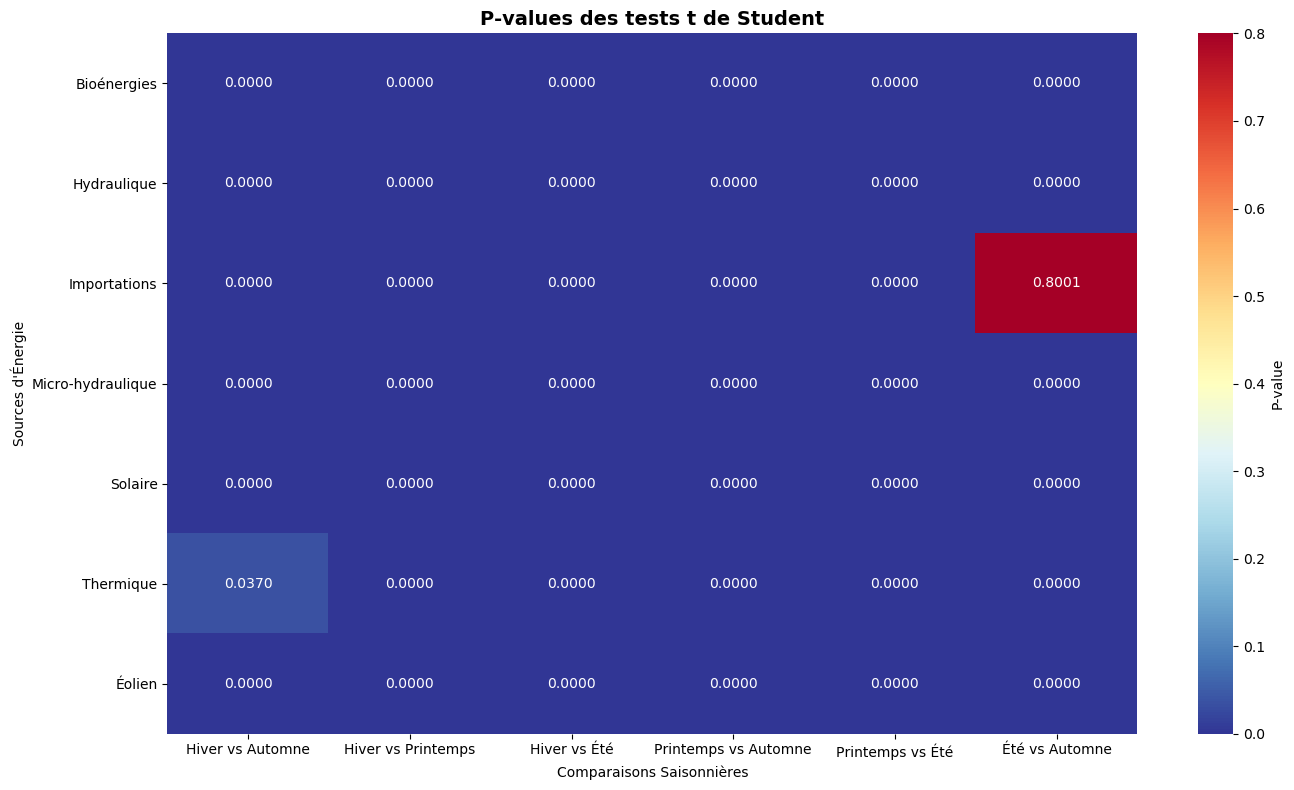

In [41]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Heatmap des p-values

fig, ax = plt.subplots(figsize=(14, 8))
    
 # Préparation des données pour la heatmap
pivot_data = df_results.pivot_table(
    index='Source_energie', 
    columns='Comparaison', 
    values='P_value', 
     aggfunc='first'
  )
    
# Heatmap des p-values (Rouge = Significatif, Bleu = Non significatif)
sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='RdYlBu_r', 
                ax=ax, cbar_kws={'label': 'P-value'})
ax.set_title('P-values des tests t de Student',  
                fontweight='bold', fontsize=14)
ax.set_xlabel('Comparaisons Saisonnières')
ax.set_ylabel('Sources d\'Énergie')
    
plt.tight_layout()
plt.savefig("Heatmap-p_value.png", dpi=100, bbox_inches='tight')

plt.show()

# Moyennes par source d'énergie et par saison (avec écarts-types)

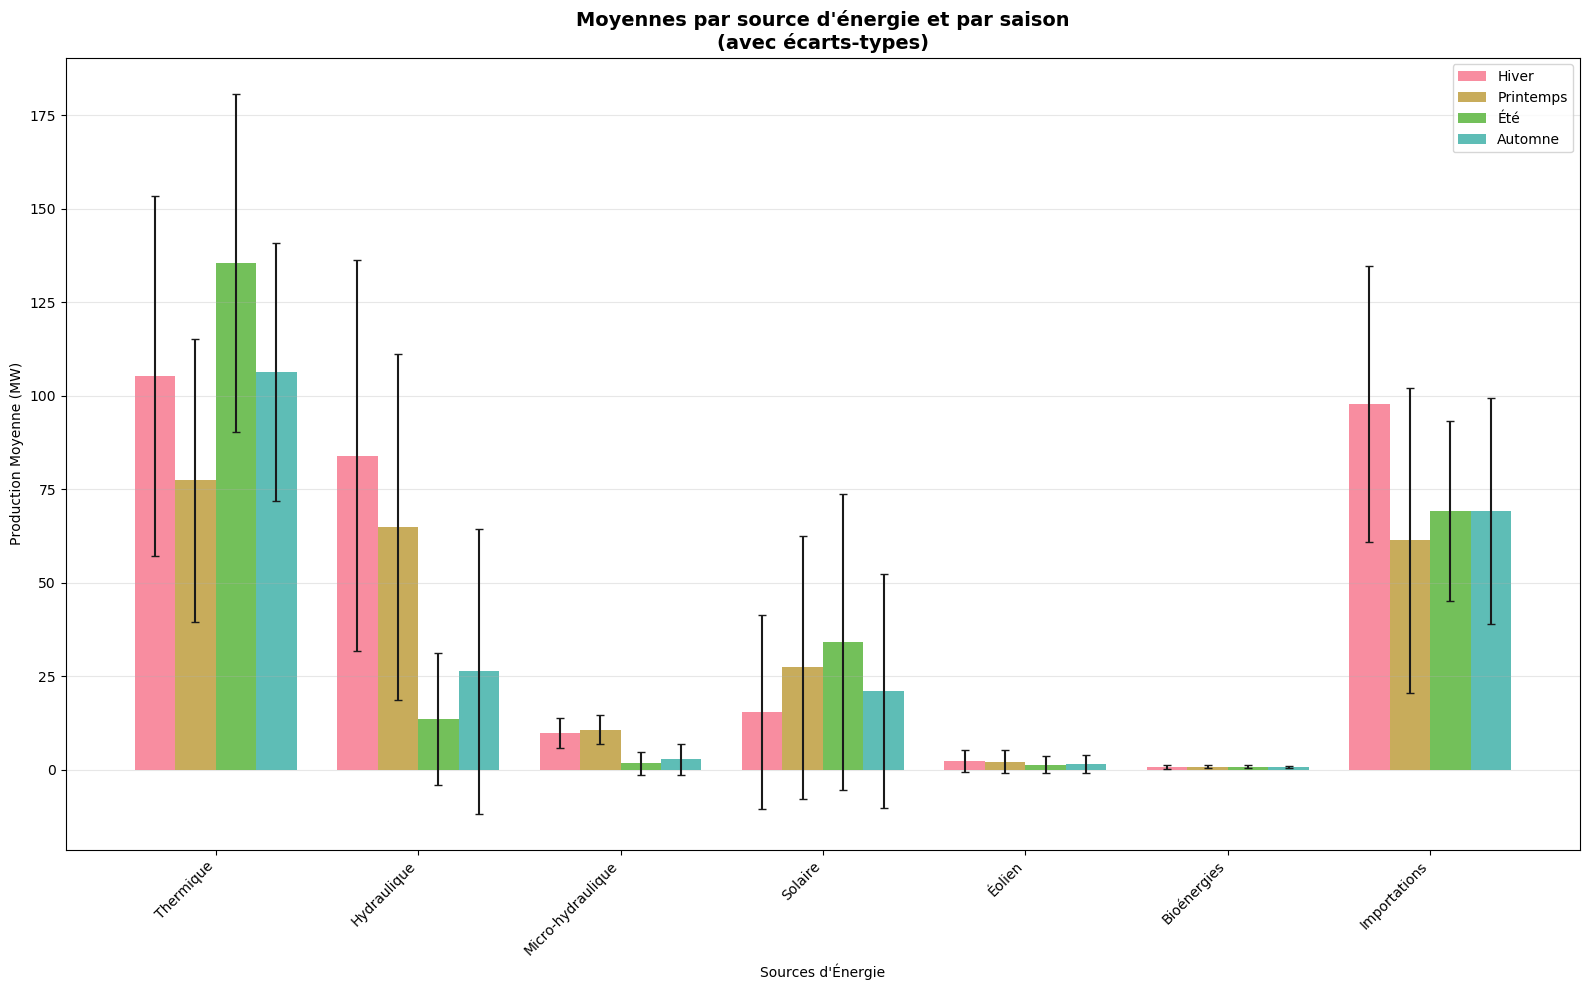

In [42]:

# Comparaison des moyennes par saison

fig, ax = plt.subplots(figsize=(16, 10))

# Préparer les données pour le graphique des moyennes
moyennes_data = []
for _, row in df_results.iterrows():
    moyennes_data.append({
        'Source': row['Source_energie'],
        'Saison': row['Groupe_1'],
        'Moyenne': row['Moyenne_1'],
        'Ecart_type': row['Ecart_type_1']
    })
    moyennes_data.append({
        'Source': row['Source_energie'],
        'Saison': row['Groupe_2'],
        'Moyenne': row['Moyenne_2'],
        'Ecart_type': row['Ecart_type_2']
    })

df_moyennes = pd.DataFrame(moyennes_data).drop_duplicates()

# Créer le graphique avec barres d'erreur
sources_list = df_moyennes['Source'].unique()
saisons_list = ['Hiver', 'Printemps', 'Été', 'Automne']

x = np.arange(len(sources_list))
width = 0.2

for i, saison in enumerate(saisons_list):
    data_saison = df_moyennes[df_moyennes['Saison'] == saison]
    if not data_saison.empty:
        moyennes = [data_saison[data_saison['Source'] == source]['Moyenne'].iloc[0] 
                   if len(data_saison[data_saison['Source'] == source]) > 0 else 0 
                   for source in sources_list]
        ecarts = [data_saison[data_saison['Source'] == source]['Ecart_type'].iloc[0] 
                 if len(data_saison[data_saison['Source'] == source]) > 0 else 0 
                 for source in sources_list]

        ax.bar(x + i*width, moyennes, width, label=saison, 
               alpha=0.8, yerr=ecarts, capsize=3)

ax.set_title('Moyennes par source d\'énergie et par saison\n(avec écarts-types)', 
            fontweight='bold', fontsize=14)
ax.set_xlabel('Sources d\'Énergie')
ax.set_ylabel('Production Moyenne (MW)')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(sources_list, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("Moyennes par Source Énergie et par Saison.png", dpi=100, bbox_inches='tight')

plt.show()

In [43]:

# Tableau de résumé des résultats significatifs

# Tests significatifs à p < 0.05
signif_05 = df_results[df_results['Significatif_005'] == True]
print(f"\nNombre de tests significatifs à p < 0.05 : {len(signif_05)}/{len(df_results)} ({len(signif_05)/len(df_results)*100:.1f}%)")

# Tests significatifs à p < 0.01
signif_01 = df_results[df_results['Significatif_001'] == True]
print(f"Nombre de tests significatifs à p < 0.01 : {len(signif_01)}/{len(df_results)} ({len(signif_01)/len(df_results)*100:.1f}%)")

if len(signif_05) > 0:
    print(f"\nTests les plus significatifs (p < 0.05) :")
    print("-" * 60)
    for _, row in signif_05.nsmallest(10, 'P_value').iterrows():
        print(f"{row['Source_energie']:15} | {row['Comparaison']:20} | p = {row['P_value']:.6f}")

print("\n" + "="*80)


Nombre de tests significatifs à p < 0.05 : 41/42 (97.6%)
Nombre de tests significatifs à p < 0.01 : 40/42 (95.2%)

Tests les plus significatifs (p < 0.05) :
------------------------------------------------------------
Thermique       | Hiver vs Printemps   | p = 0.000000
Thermique       | Hiver vs Été         | p = 0.000000
Thermique       | Printemps vs Été     | p = 0.000000
Thermique       | Printemps vs Automne | p = 0.000000
Thermique       | Été vs Automne       | p = 0.000000
Hydraulique     | Hiver vs Été         | p = 0.000000
Hydraulique     | Hiver vs Automne     | p = 0.000000
Hydraulique     | Printemps vs Été     | p = 0.000000
Hydraulique     | Printemps vs Automne | p = 0.000000
Micro-hydraulique | Hiver vs Été         | p = 0.000000



# violin

In [44]:
dfclean

Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 00:00:00+00:00      Corse  Validé              289.130663   
2018-01-01 07:00:00+00:00      Corse  Validé              258.058032   
2018-01-01 06:00:00+00:00      Corse  Validé              250.330295   
2018-01-01 05:00:00+00:00      Corse  Validé              244.987619   
2018-01-01 04:00:00+00:00      Corse  Validé              241.292681   
...                              ...     ...                     ...   
2017-12-22 13:00:00+00:00      Corse  Validé              350.284667   
2017-12-22 14:00:00+00:00      Corse  Validé              342.799333   
2017-12-22 15:00:00+00:00      Corse  Validé              350.665833   
2017-12-22 17:00:00+00:00      Corse  Validé              419.699333   
2022-12-31 22:00:00+00:00      Corse  Estimé              285.950000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2018-01-01 07:00:00+00:00       56.325743         81.842450   
2018-01-01 06:00:00+00:00       56.431011         77.648959   
2018-01-01 05:00:00+00:00       56.403197         80.627778   
2018-01-01 04:00:00+00:00       55.908683         75.731629   
...                                   ...               ...   
2017-12-22 13:00:00+00:00      149.988000         49.194000   
2017-12-22 14:00:00+00:00      149.865000         46.721000   
2017-12-22 15:00:00+00:00      152.860000         48.160000   
2017-12-22 17:00:00+00:00      157.803000        111.036000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2018-01-01 07:00:00+00:00               11.451231   
2018-01-01 06:00:00+00:00               11.279231   
2018-01-01 05:00:00+00:00               11.655231   
2018-01-01 04:00:00+00:00               11.639231   
...                                           ...   
2017-12-22 13:00:00+00:00                4.610000   
2017-12-22 14:00:00+00:00                4.556000   
2017-12-22 15:00:00+00:00                4.451000   
2017-12-22 17:00:00+00:00                4.522000   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756      0.21459   
2018-01-01 07:00:00+00:00                     3.186745      4.87200   
2018-01-01 06:00:00+00:00                    -0.281581      4.60400   
2018-01-01 05:00:00+00:00                    -0.255605      4.03400   
2018-01-01 04:00:00+00:00                    -0.257683      5.45000   
...                                                ...          ...   
2017-12-22 13:00:00+00:00                    48.134500      0.13000   
2017-12-22 14:00:00+00:00                    24.523167      0.06900   
2017-12-22 15:00:00+00:00                     4.220500      0.01100   
2017-12-22 17:00:00+00:00                    -0.277000     -0.01700   
2022-12-31 22:00:00+00:00                    -0.460000      0.10000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 00:00:00+00:00          1.829167         117.392059   
2018-01-01 07:00:00+00:00          0.896000          99.483864   
2018-01-01 06:00:00+00:00          0.896000          99.752675   
2018-01-01 05:00:00+00:00          0.896000          91.627018   
2018-01-01 04:00:00+00:00          0.896000          91.924821   
...                                     ...                ...   
2017-12-22 13:00:00+00:00          1.290167          96.938000   
2017-12-22 14:00:00+00:00          1.290167         115.77500

## Production totale (MW) par année

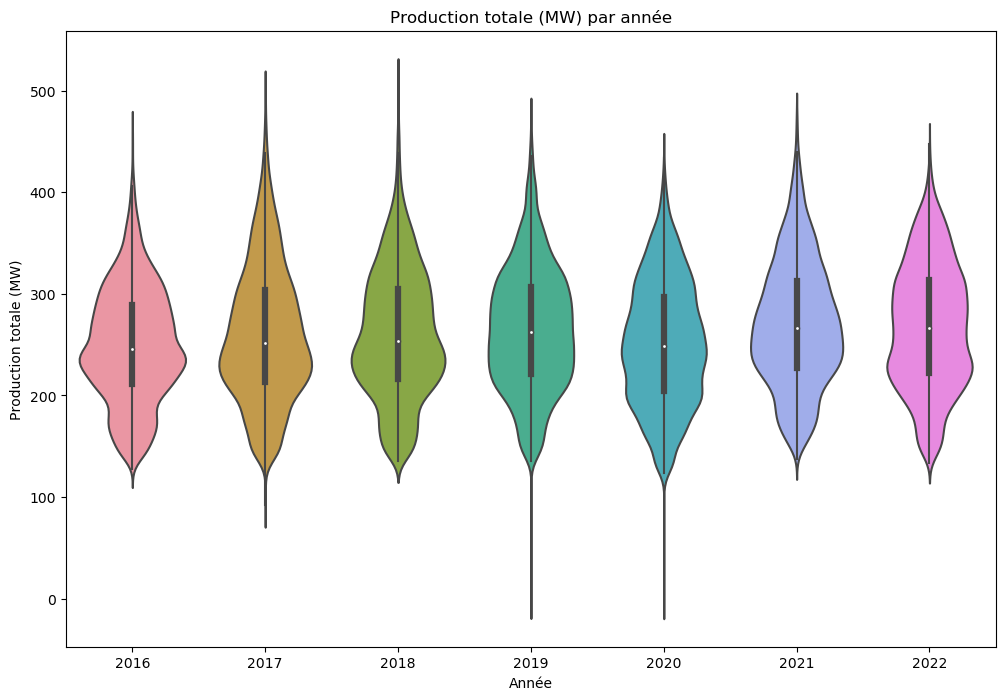

In [45]:
# Année
plt.figure()
plt.title('Production totale (MW) par année')
sns.violinplot(data=dfclean, x='Année', y ='Production totale (MW)')
plt.show()

## Production totale (MW) par saison

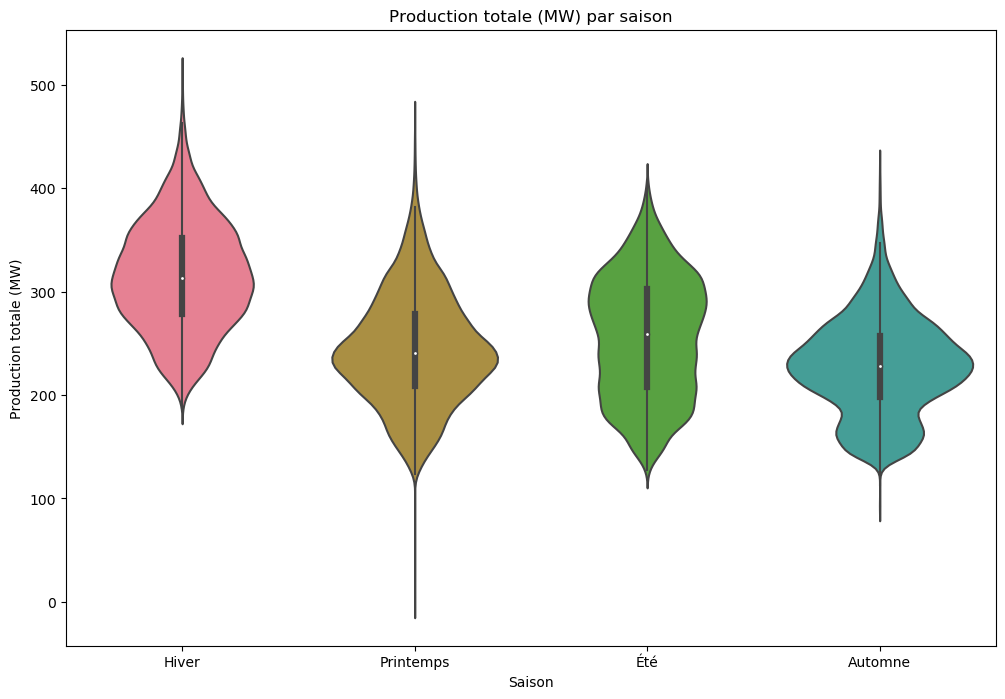

In [46]:
plt.figure()
plt.title('Production totale (MW) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Production totale (MW)')
plt.savefig("Violin-plot-Production totale (MW) par saison", dpi=100, bbox_inches='tight')
plt.show()

## Production Thermique (MW) par saison

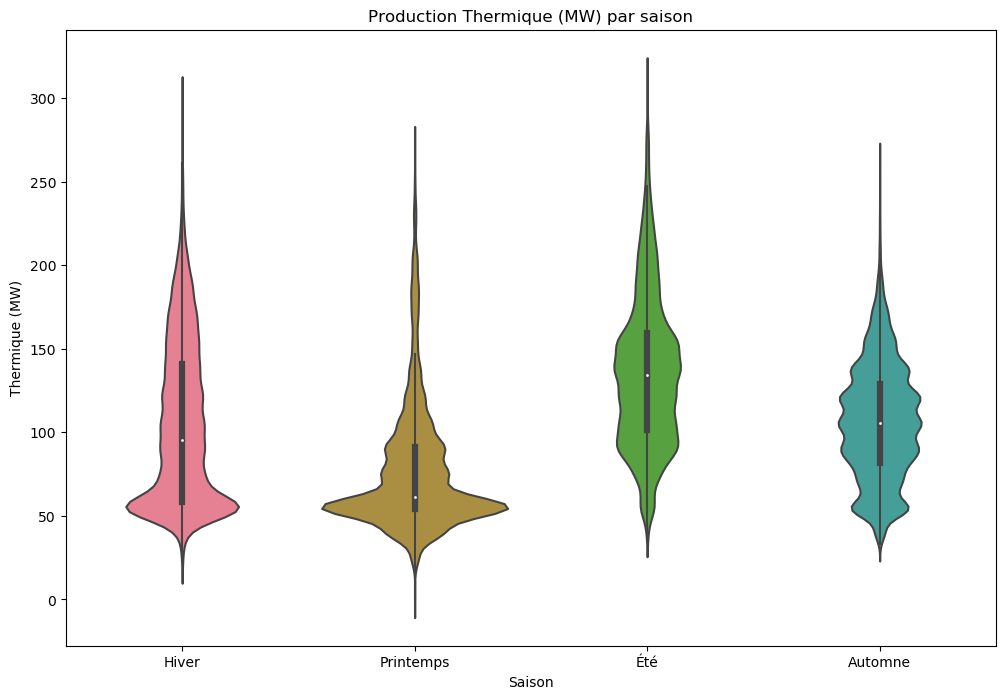

In [47]:
plt.figure()
plt.title('Production Thermique (MW) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Thermique (MW)')
plt.show()

## Production Hydraulique (MW) par saison

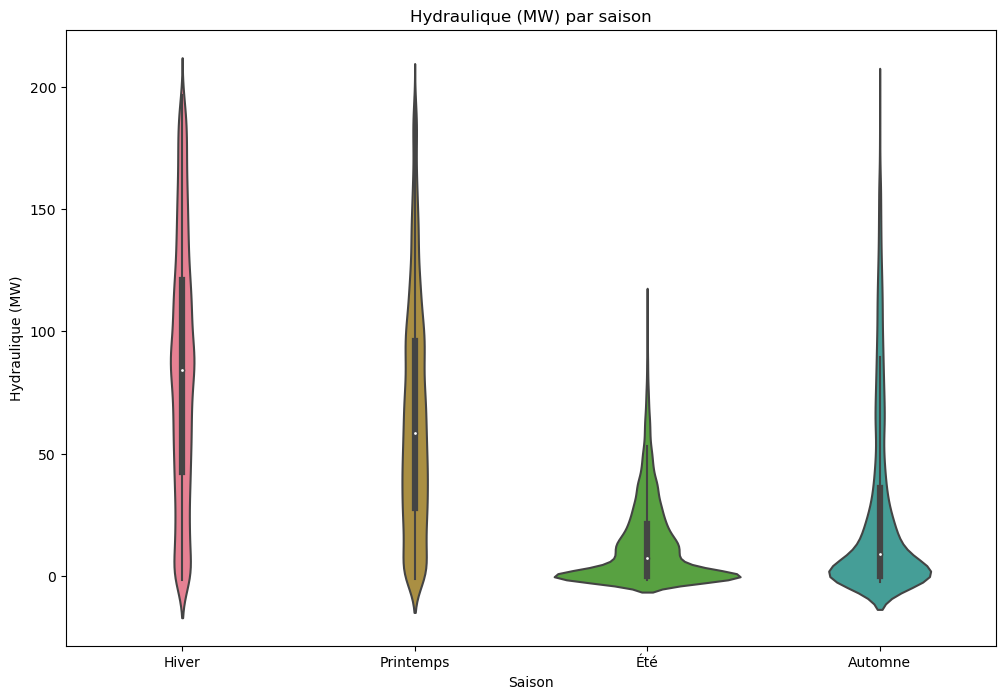

In [48]:
plt.figure()
plt.title('Hydraulique (MW) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Hydraulique (MW)')
plt.show()

## Production Micro-Hydraulique (MW) par saison

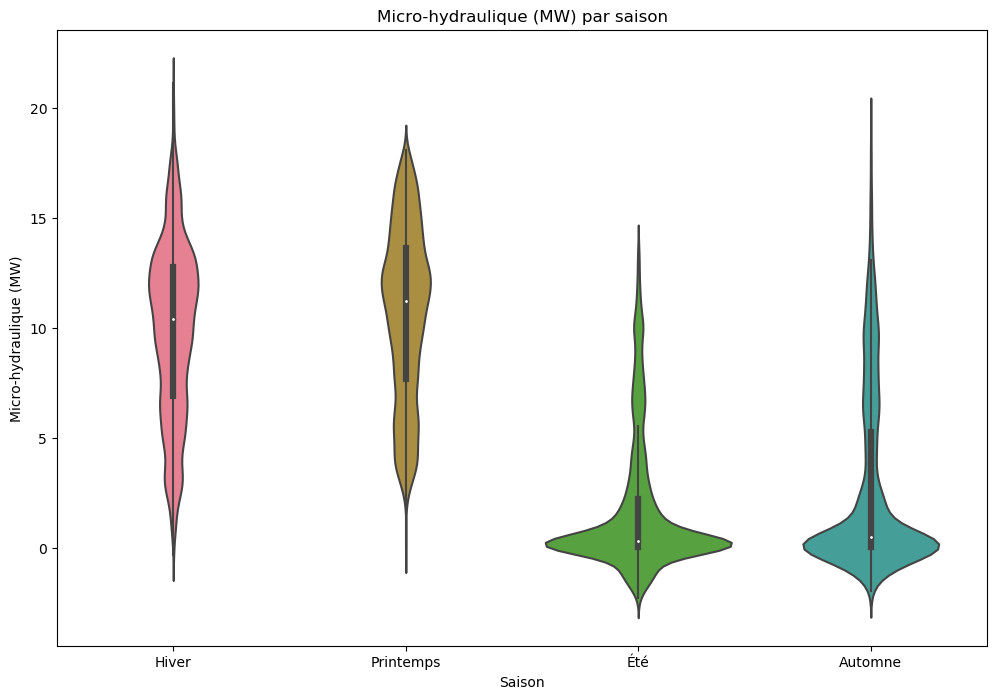

In [49]:
plt.figure()
plt.title('Micro-hydraulique (MW) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Micro-hydraulique (MW)')
plt.show()

## Production photovoltaïque (MW) par saison

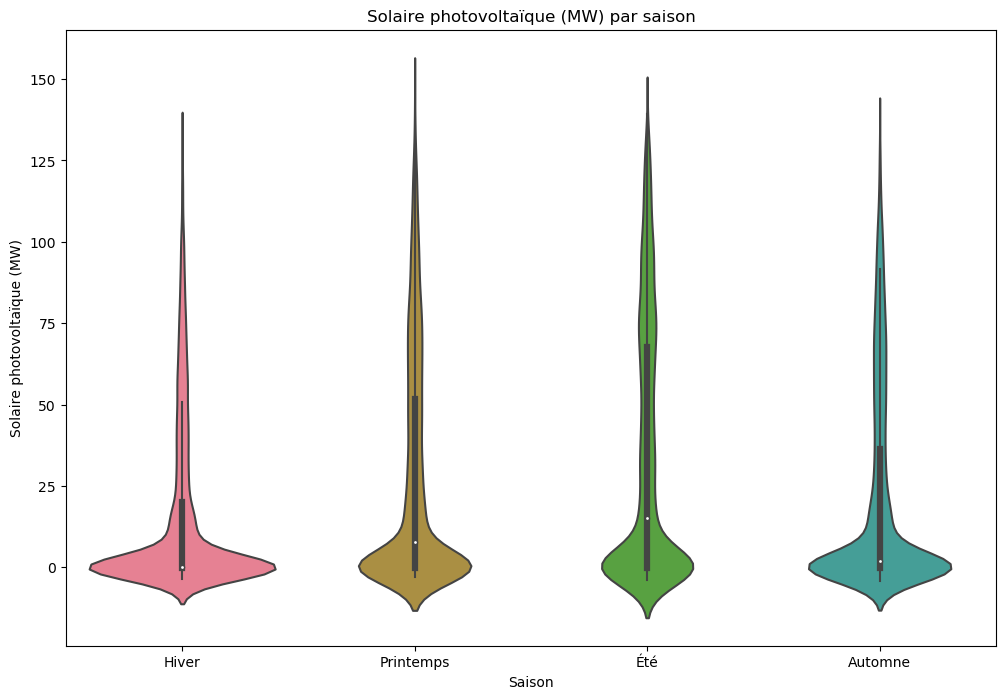

In [50]:
plt.figure()
plt.title('Solaire photovoltaïque (MW) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Solaire photovoltaïque (MW)')
plt.show()

## Importations (MW) par saison

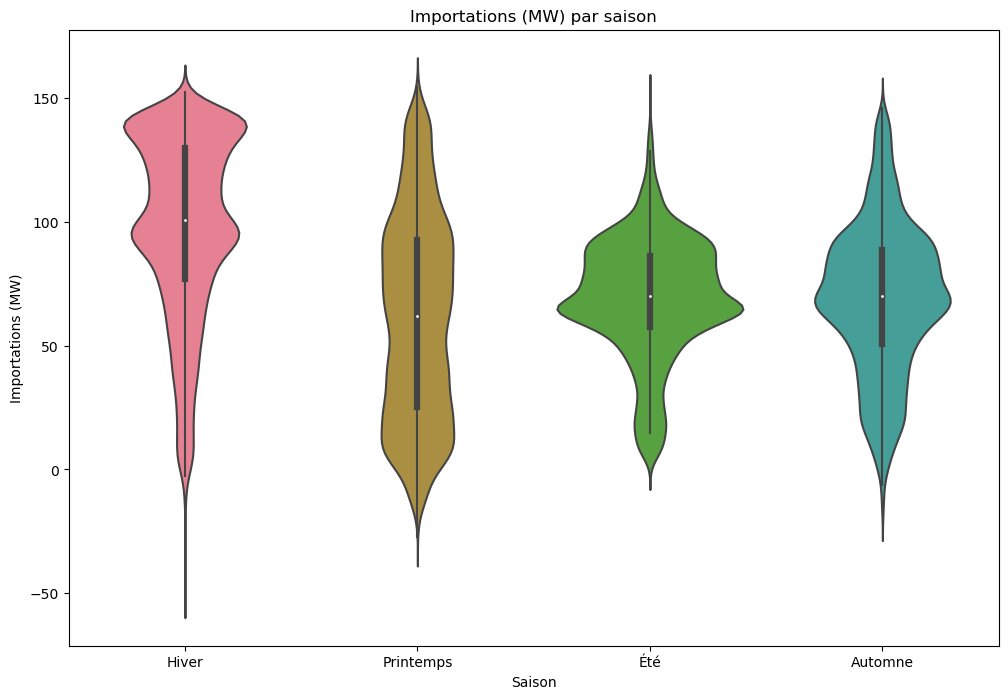

In [51]:
plt.figure()
plt.title('Importations (MW) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Importations (MW)')
plt.show()

## Coût moyen de production (€/MWh) par saison

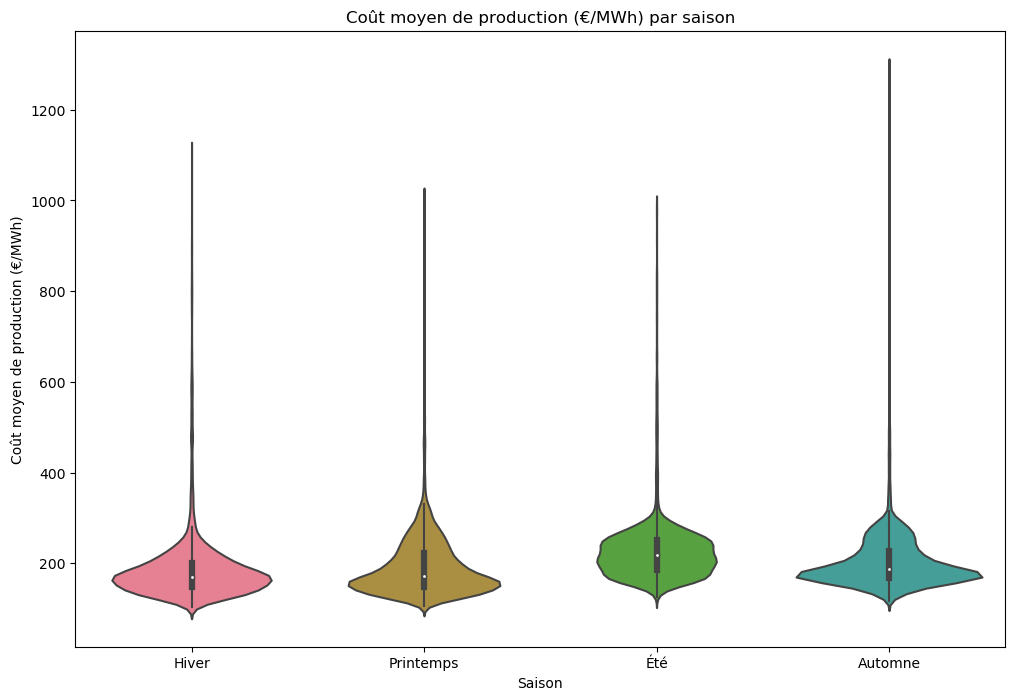

In [52]:
plt.figure()
plt.title('Coût moyen de production (€/MWh) par saison')
sns.violinplot(data=dfclean, x='Saison', y ='Coût moyen de production (€/MWh)')
plt.show()

## Production totale (MW) par mois

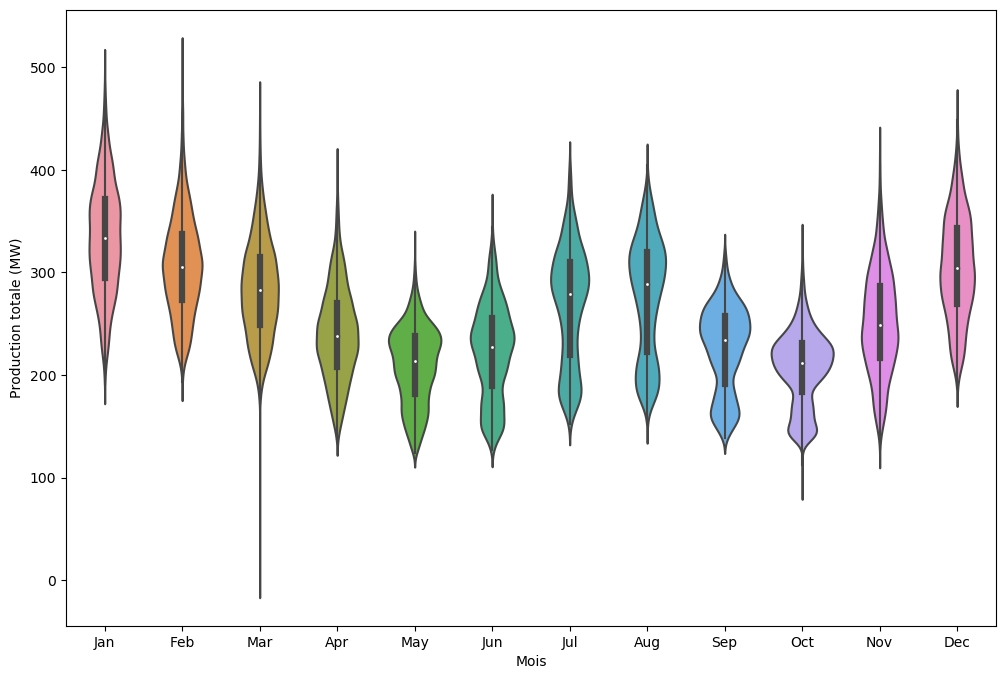

In [53]:
sns.violinplot(data=dfclean, x='Mois', y ='Production totale (MW)')

## Pairplot

In [54]:
dfclean

Territoire  Statut  Production totale (MW)  \
Date                                                                   
2016-01-01 00:00:00+00:00      Corse  Validé              289.130663   
2018-01-01 07:00:00+00:00      Corse  Validé              258.058032   
2018-01-01 06:00:00+00:00      Corse  Validé              250.330295   
2018-01-01 05:00:00+00:00      Corse  Validé              244.987619   
2018-01-01 04:00:00+00:00      Corse  Validé              241.292681   
...                              ...     ...                     ...   
2017-12-22 13:00:00+00:00      Corse  Validé              350.284667   
2017-12-22 14:00:00+00:00      Corse  Validé              342.799333   
2017-12-22 15:00:00+00:00      Corse  Validé              350.665833   
2017-12-22 17:00:00+00:00      Corse  Validé              419.699333   
2022-12-31 22:00:00+00:00      Corse  Estimé              285.950000   

                           Thermique (MW)  Hydraulique (MW)  \
Date                                                          
2016-01-01 00:00:00+00:00      166.800841         -1.839914   
2018-01-01 07:00:00+00:00       56.325743         81.842450   
2018-01-01 06:00:00+00:00       56.431011         77.648959   
2018-01-01 05:00:00+00:00       56.403197         80.627778   
2018-01-01 04:00:00+00:00       55.908683         75.731629   
...                                   ...               ...   
2017-12-22 13:00:00+00:00      149.988000         49.194000   
2017-12-22 14:00:00+00:00      149.865000         46.721000   
2017-12-22 15:00:00+00:00      152.860000         48.160000   
2017-12-22 17:00:00+00:00      157.803000        111.036000   
2022-12-31 22:00:00+00:00       77.020000         52.010000   

                           Micro-hydraulique (MW)  \
Date                                                
2016-01-01 00:00:00+00:00                4.773676   
2018-01-01 07:00:00+00:00               11.451231   
2018-01-01 06:00:00+00:00               11.279231   
2018-01-01 05:00:00+00:00               11.655231   
2018-01-01 04:00:00+00:00               11.639231   
...                                           ...   
2017-12-22 13:00:00+00:00                4.610000   
2017-12-22 14:00:00+00:00                4.556000   
2017-12-22 15:00:00+00:00                4.451000   
2017-12-22 17:00:00+00:00                4.522000   
2022-12-31 22:00:00+00:00                8.762500   

                           Solaire photovoltaïque (MW)  Eolien (MW)  \
Date                                                                  
2016-01-01 00:00:00+00:00                    -0.039756      0.21459   
2018-01-01 07:00:00+00:00                     3.186745      4.87200   
2018-01-01 06:00:00+00:00                    -0.281581      4.60400   
2018-01-01 05:00:00+00:00                    -0.255605      4.03400   
2018-01-01 04:00:00+00:00                    -0.257683      5.45000   
...                                                ...          ...   
2017-12-22 13:00:00+00:00                    48.134500      0.13000   
2017-12-22 14:00:00+00:00                    24.523167      0.06900   
2017-12-22 15:00:00+00:00                     4.220500      0.01100   
2017-12-22 17:00:00+00:00                    -0.277000     -0.01700   
2022-12-31 22:00:00+00:00                    -0.460000      0.10000   

                           Bioénergies (MW)  Importations (MW)  \
Date                                                             
2016-01-01 00:00:00+00:00          1.829167         117.392059   
2018-01-01 07:00:00+00:00          0.896000          99.483864   
2018-01-01 06:00:00+00:00          0.896000          99.752675   
2018-01-01 05:00:00+00:00          0.896000          91.627018   
2018-01-01 04:00:00+00:00          0.896000          91.924821   
...                                     ...                ...   
2017-12-22 13:00:00+00:00          1.290167          96.938000   
2017-12-22 14:00:00+00:00          1.290167         115.77500

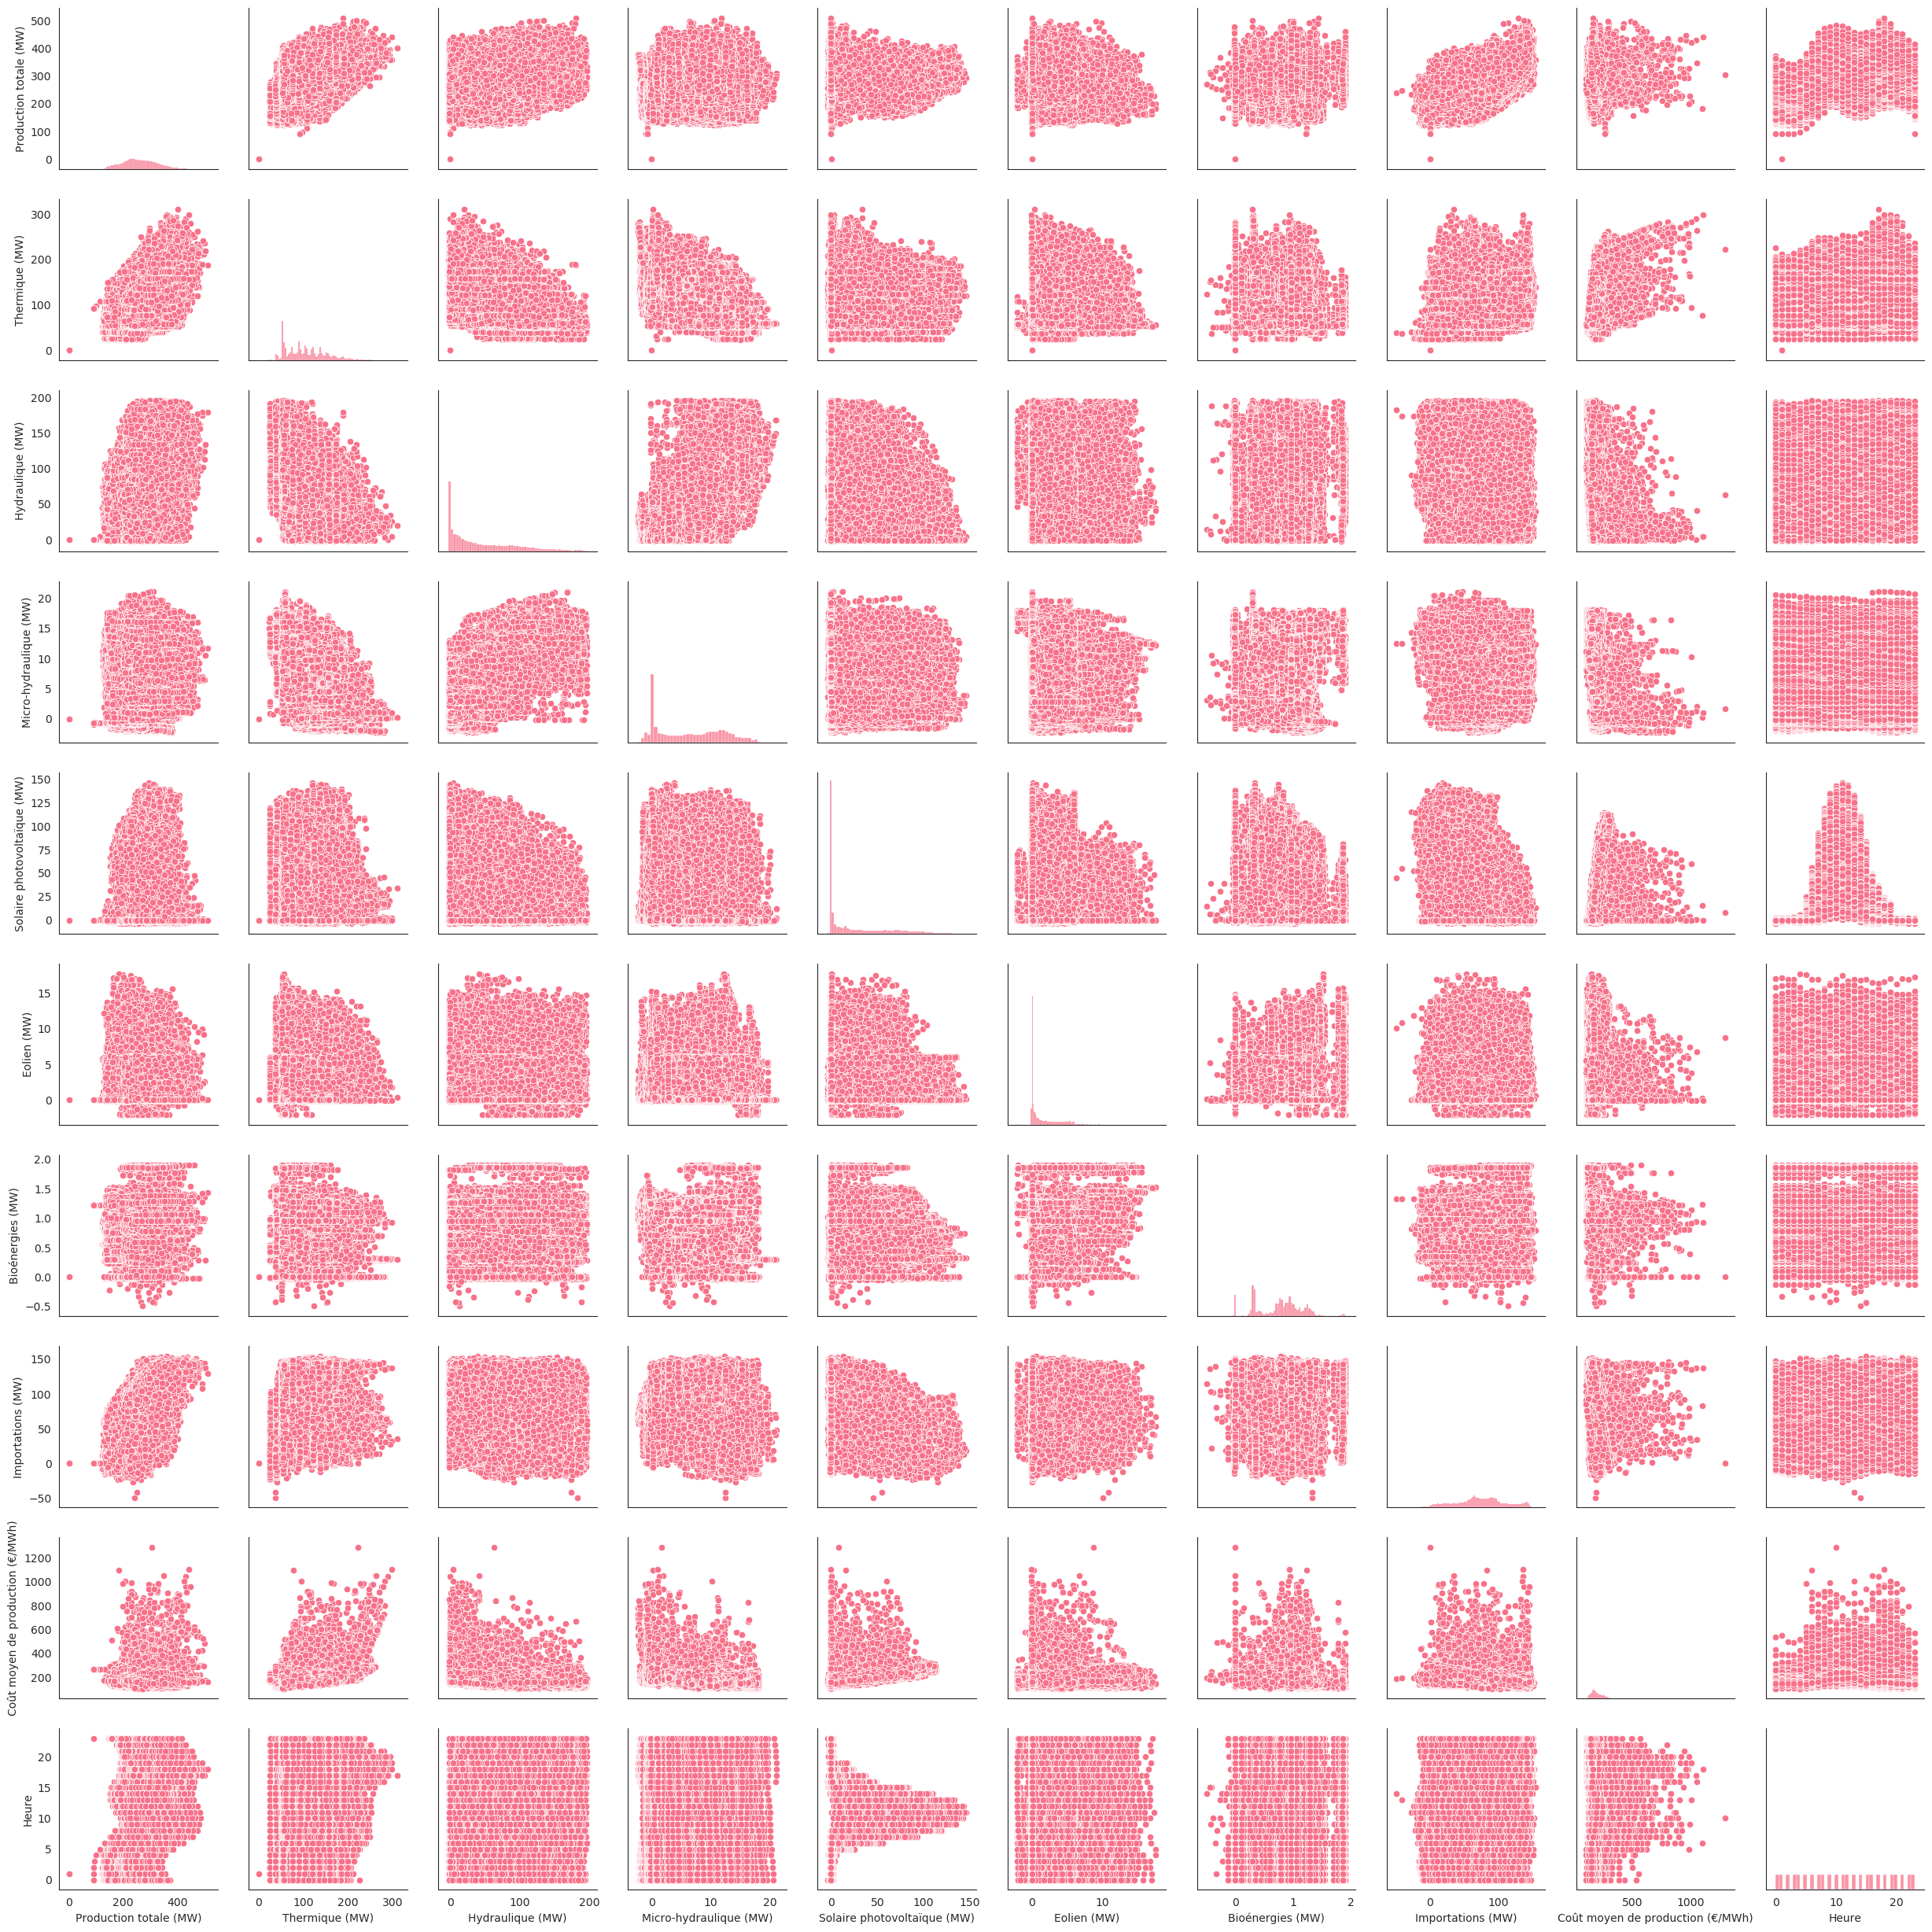

In [55]:
sns.set_style('white')
sns.pairplot(dfclean.drop(['Territoire','Statut','Année','Saison'],axis=1), palette='afmhot')
